In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from simulation_funcs import (
    get_subdata_long,
    create_design_matrices,
    get_beta_dicts,
    create_contrasts,
    make_analysis_label,
    sim_group_models_parallel,
    est_eff_vif_all_subs,
)

from simulation_plotting import (
    plot_results,
    plot_dict_of_results,
    plot_design_ordered_regressors,
)

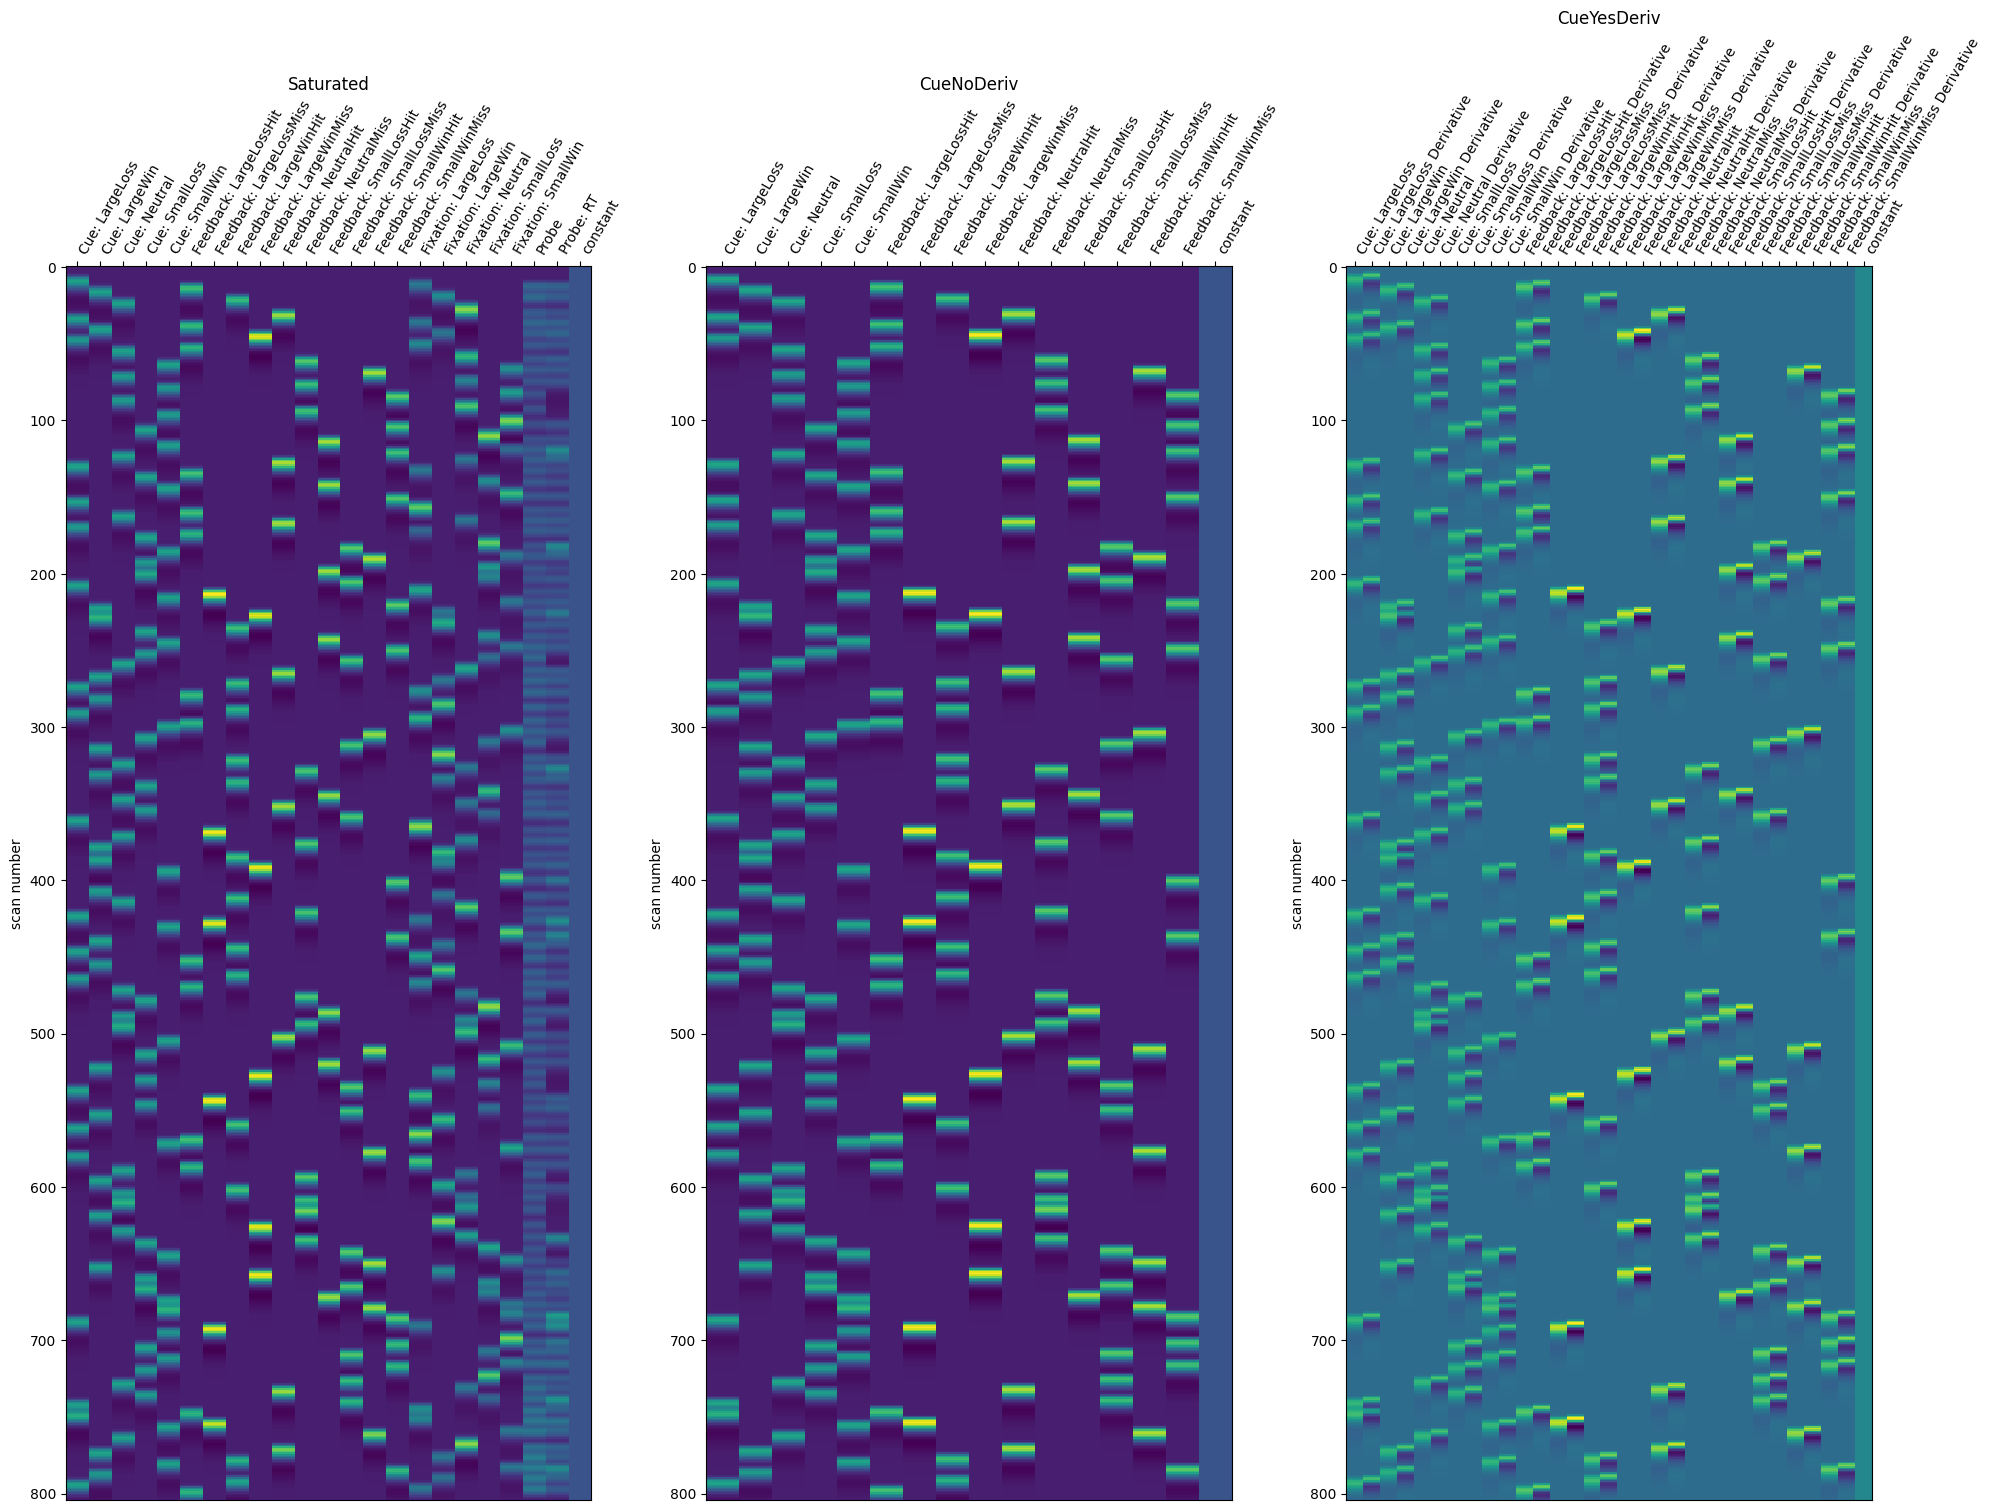

In [2]:
sub = 4
dataset = 'ABCD'
events = get_subdata_long(sub, dataset=dataset)
designs = create_design_matrices(events, oversampling=50, tr=0.8)

fig, ax = plt.subplots(1, 3, figsize=(20, 15))
ax_flat = ax.flatten()
for i, desname in enumerate(designs.keys()):
    plot_design_ordered_regressors(designs[desname], desname, ax=ax_flat[i])
plt.show()

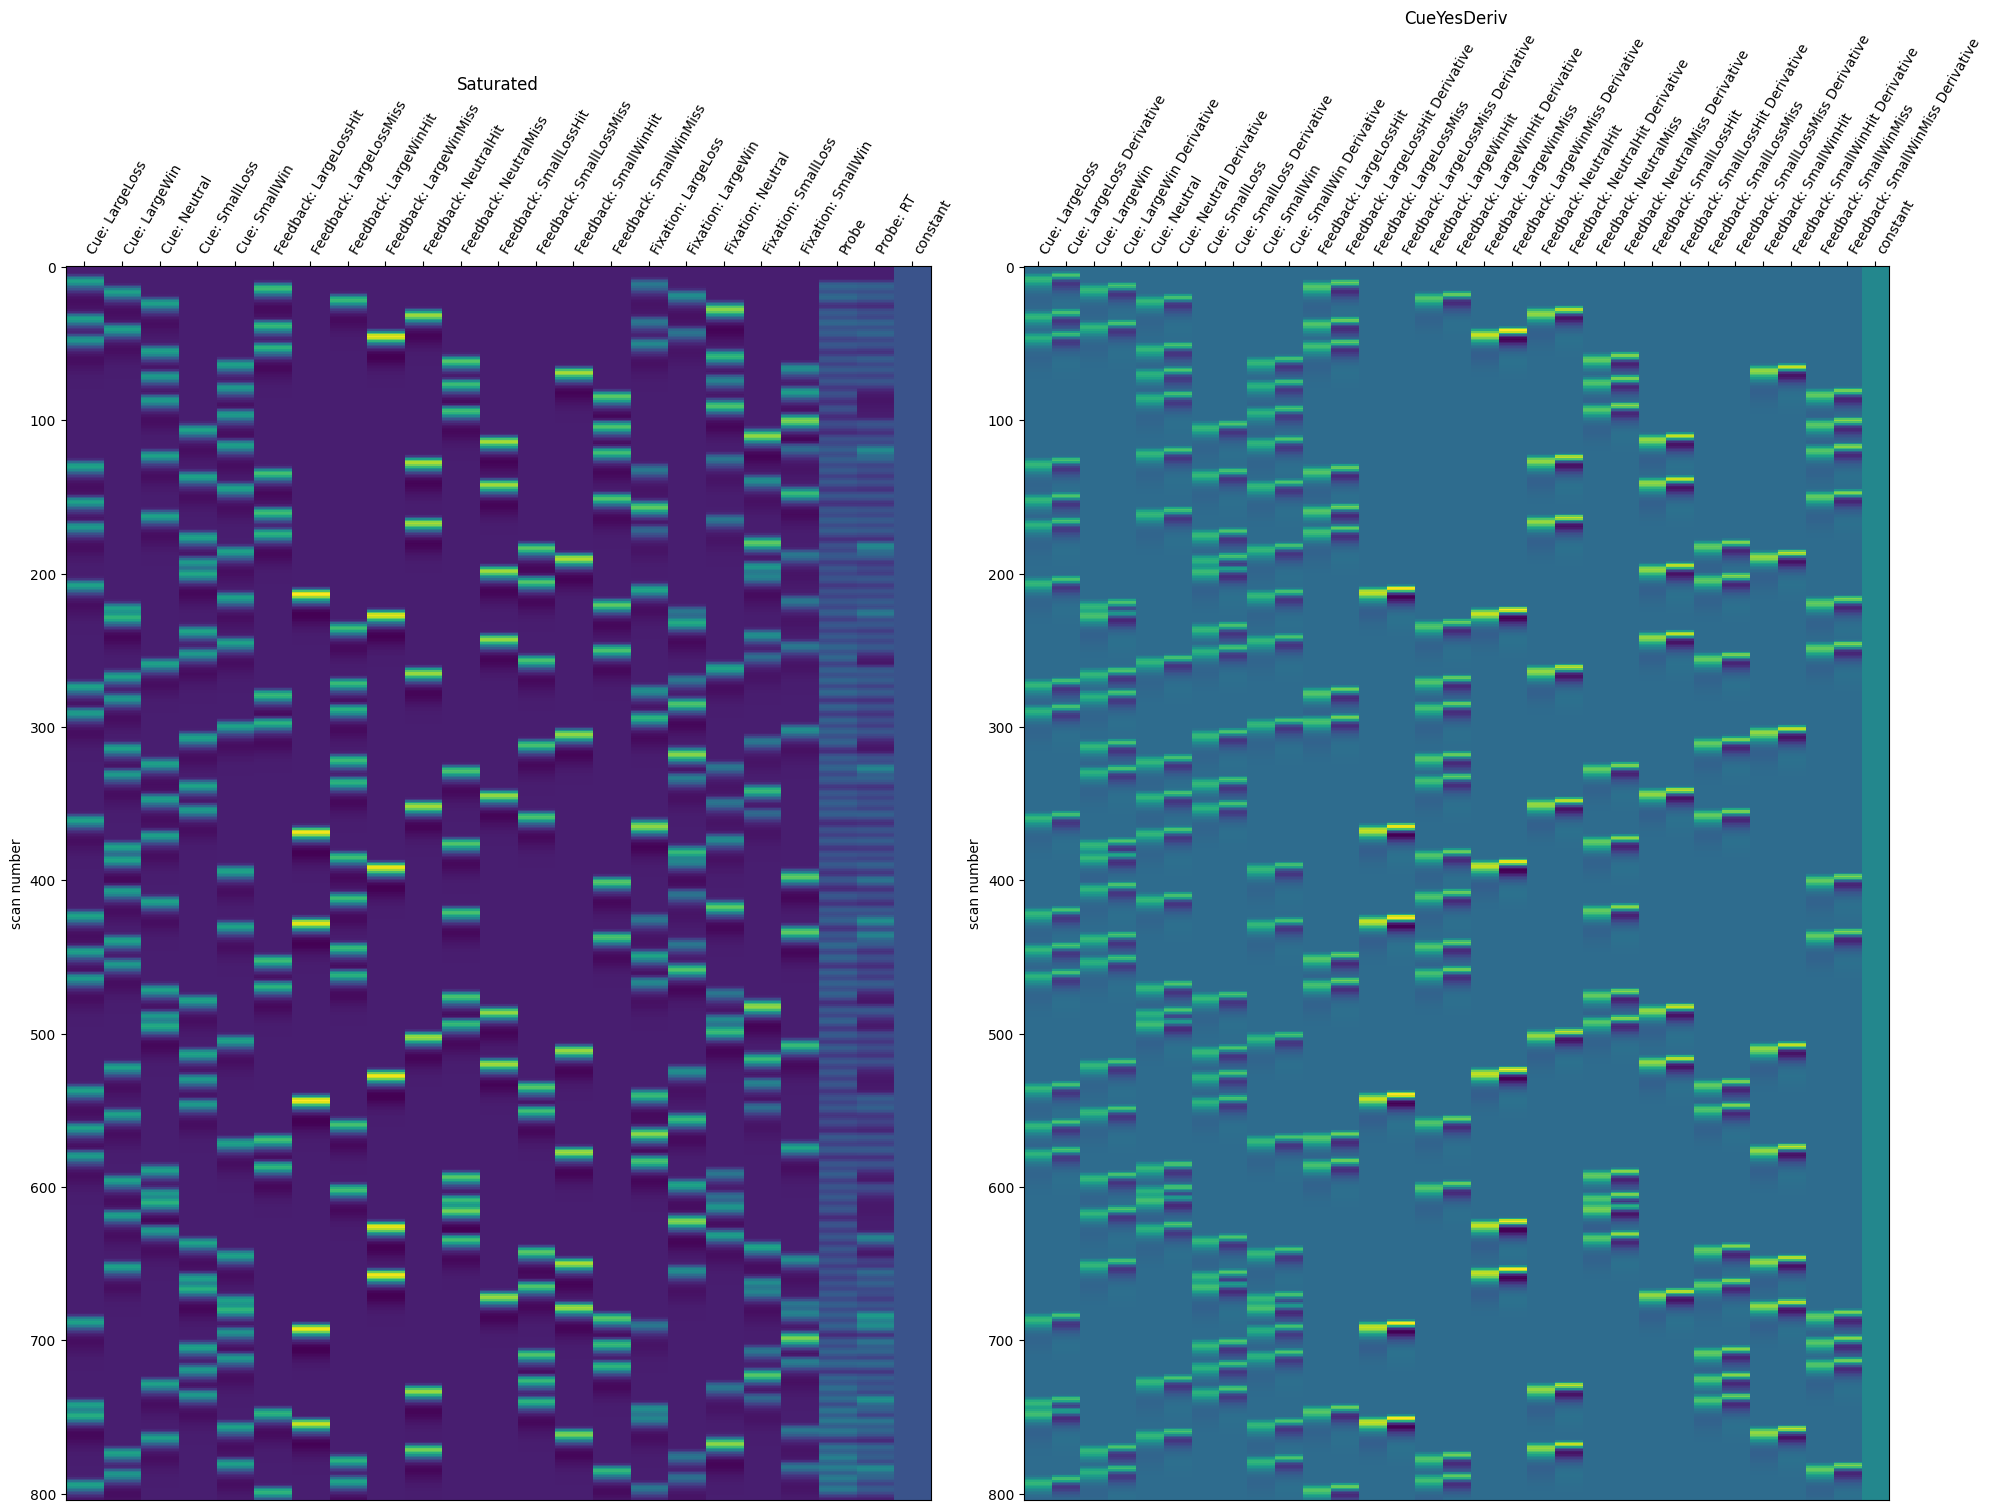

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(20, 15))
ax_flat = ax.flatten()
for i, desname in enumerate(['Saturated', 'CueYesDeriv']):
    plot_design_ordered_regressors(designs[desname], desname, ax=ax_flat[i])
plt.show()

In [4]:
contrast_strings, contrasts_matrices, c_pinv_xmats = create_contrasts(designs)
interesting_contrast_substr = ['CUE:', 'FB:']
for key, contrasts in contrast_strings.items():
    print(f'\n Contrasts for {key} model')
    for contrast_name, contrast_string in contrasts.items():
        if any(x in contrast_name for x in interesting_contrast_substr):
            print(f'{contrast_name}: {contrast_string}')


 Contrasts for Saturated model
CUE: W-base: .5 * Cue_LargeWin  + .5 * Cue_SmallWin
CUE: W-Neut: .5 * Cue_LargeWin  + .5 * Cue_SmallWin - 1 * Cue_Neutral
CUE: LW-Neut: 1 * Cue_LargeWin - 1 * Cue_Neutral
FB: WHit-NeutHit: .5 * Feedback_LargeWinHit + .5 * Feedback_SmallWinHit - 1 * Feedback_NeutralHit
FB: LWHit-LWMiss: 1 * Feedback_LargeWinHit - 1 * Feedback_LargeWinMiss

 Contrasts for CueNoDeriv model
CUE: W-base: .5 * Cue_LargeWin  + .5 * Cue_SmallWin
CUE: W-Neut: .5 * Cue_LargeWin  + .5 * Cue_SmallWin - 1 * Cue_Neutral
CUE: LW-Neut: 1 * Cue_LargeWin - 1 * Cue_Neutral
FB: WHit-NeutHit: .5 * Feedback_LargeWinHit + .5 * Feedback_SmallWinHit - 1 * Feedback_NeutralHit
FB: LWHit-LWMiss: 1 * Feedback_LargeWinHit - 1 * Feedback_LargeWinMiss

 Contrasts for CueYesDeriv model
CUE: W-base: .5 * Cue_LargeWin  + .5 * Cue_SmallWin
CUE: W-Neut: .5 * Cue_LargeWin  + .5 * Cue_SmallWin - 1 * Cue_Neutral
CUE: LW-Neut: 1 * Cue_LargeWin - 1 * Cue_Neutral
FB: WHit-NeutHit: .5 * Feedback_LargeWinHit + .5 *

In [5]:
beta_dicts = get_beta_dicts(dataset='ABCD')


dataset = 'ABCD'
beta_sub_sd = 1
noise_sd = 1
nsims = 1000
results = {}

for beta_dict in beta_dicts:
    print(beta_dict)
    figure_label = make_analysis_label(beta_dict)
    results[figure_label], _, model_example = sim_group_models_parallel(
        beta_dict,
        noise_sd,
        beta_sub_sd,
        nsims=nsims,
        oversampling=50,
        tr=0.8,
        dataset=dataset,
        nsubs=100,
    )

{}
{'Cue: LargeWin': 0.3, 'Cue: SmallWin': 0.3}
{'Fixation: LargeWin': 0.3, 'Fixation: SmallWin': 0.3}
{'Cue: LargeWin': 0.3, 'Cue: SmallWin': 0.3, 'Fixation: LargeWin': 0.3, 'Fixation: SmallWin': 0.3}
{'Probe': 1.25}
{'Probe: RT': 0.75}
{'Feedback: LargeWinHit': 0.4, 'Feedback: SmallWinHit': 0.4}
{'Feedback: LargeWinHit': 0.2, 'Feedback: LargeWinMiss': -0.2}


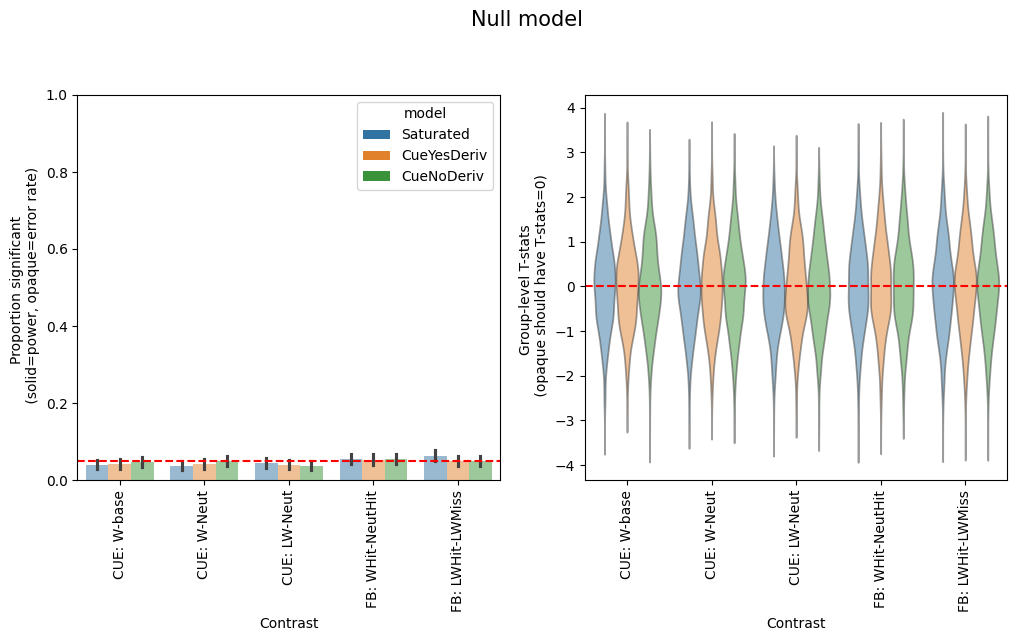

In [6]:
plot_dict_of_results({'Null model': results['Null model']}, contrasts=True)

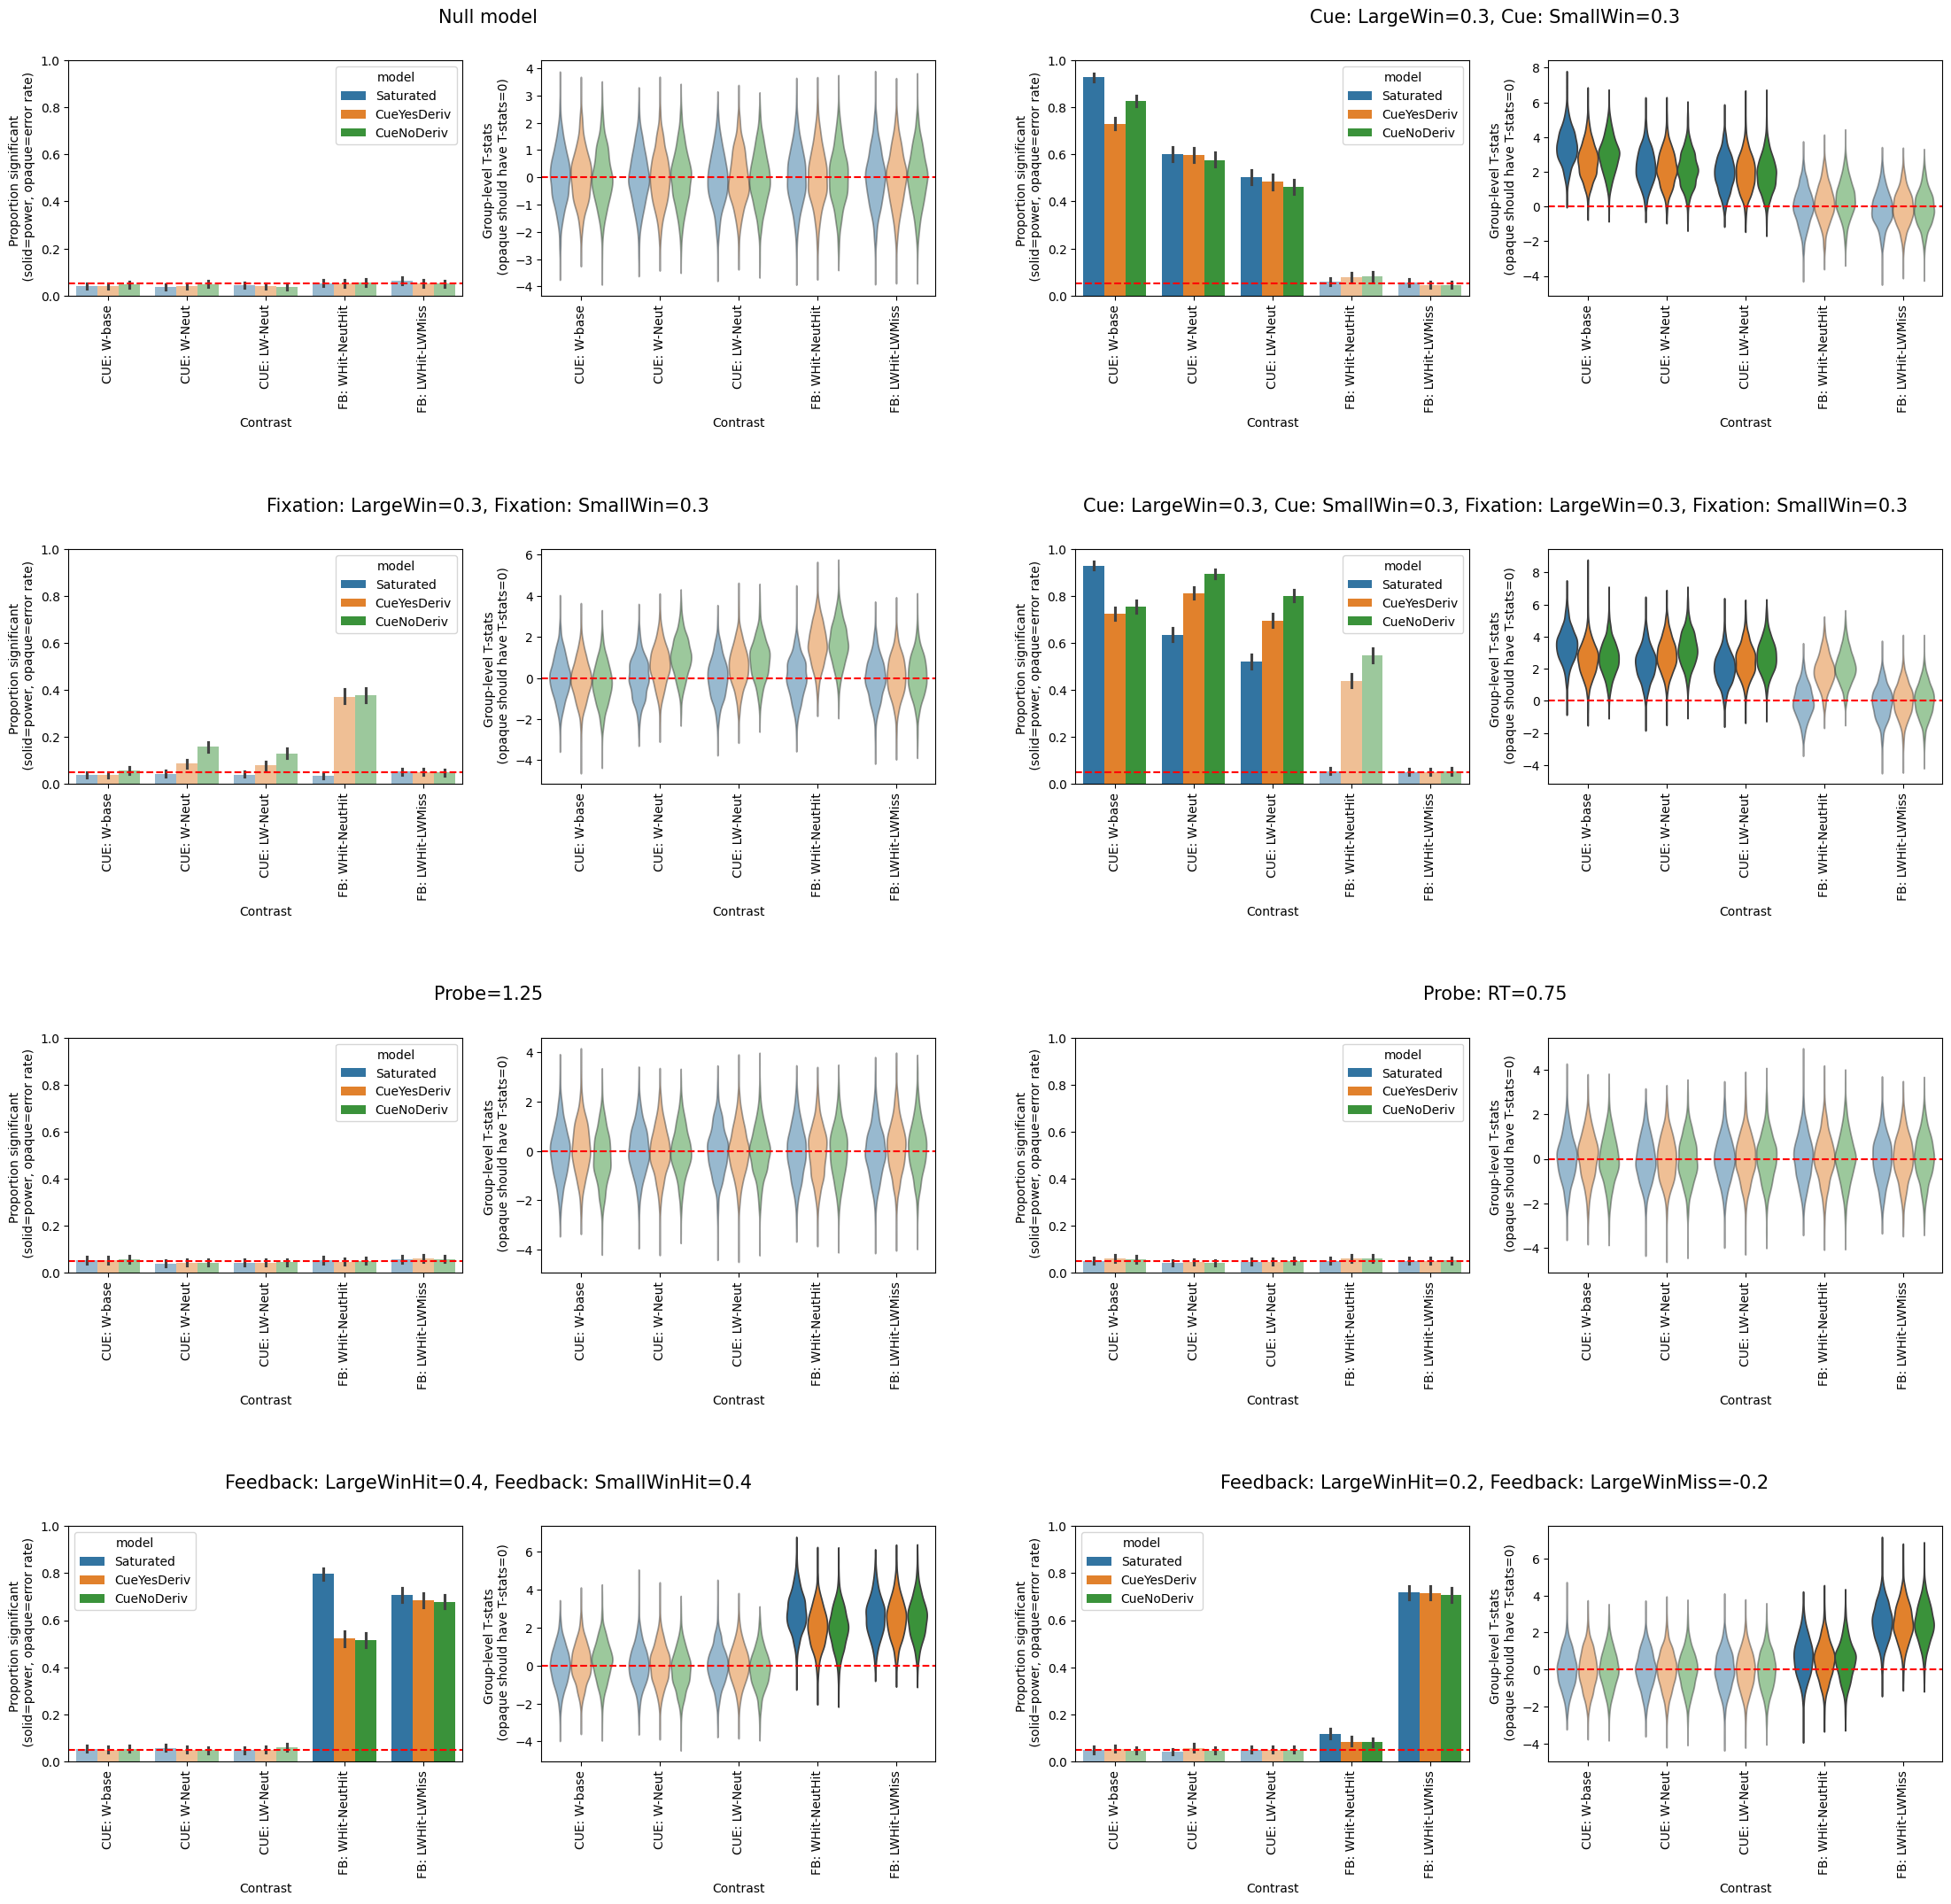

In [7]:
# Plot breaks if you don't enter an even number of results, so I include the null again.
# results_plot = results.copy()
# results_plot.pop('Null model')
plot_dict_of_results(results, contrasts=True)

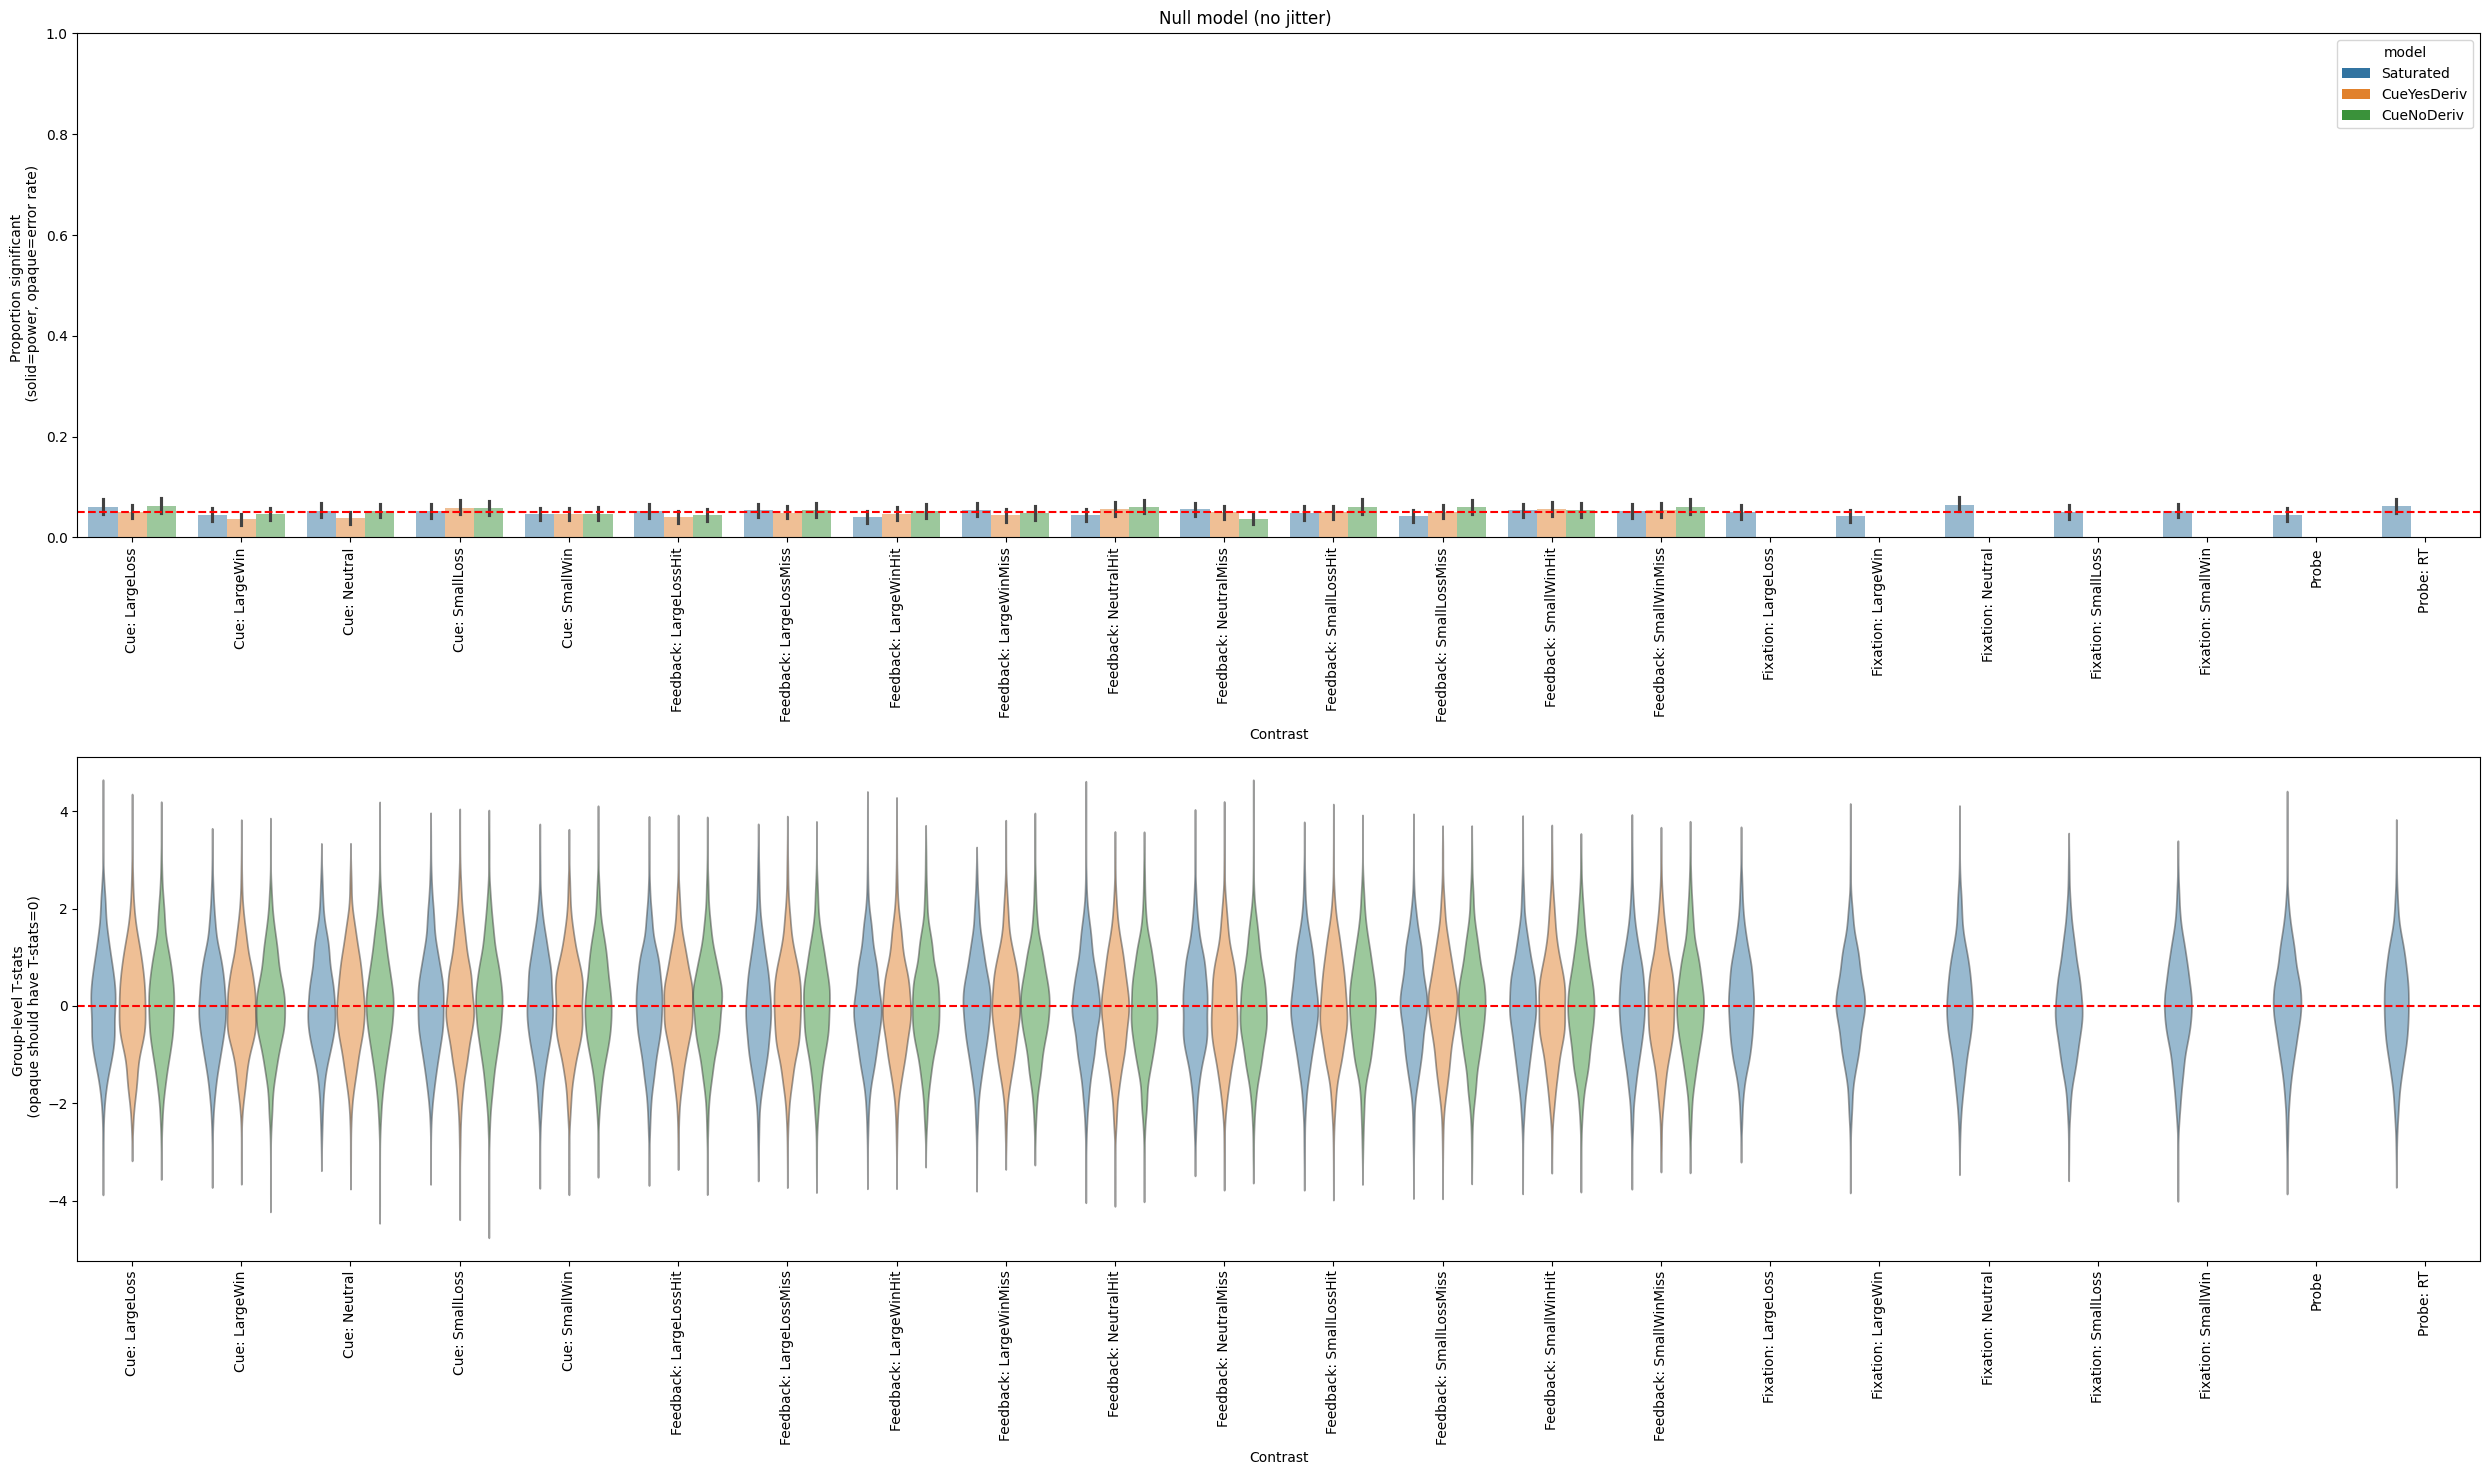

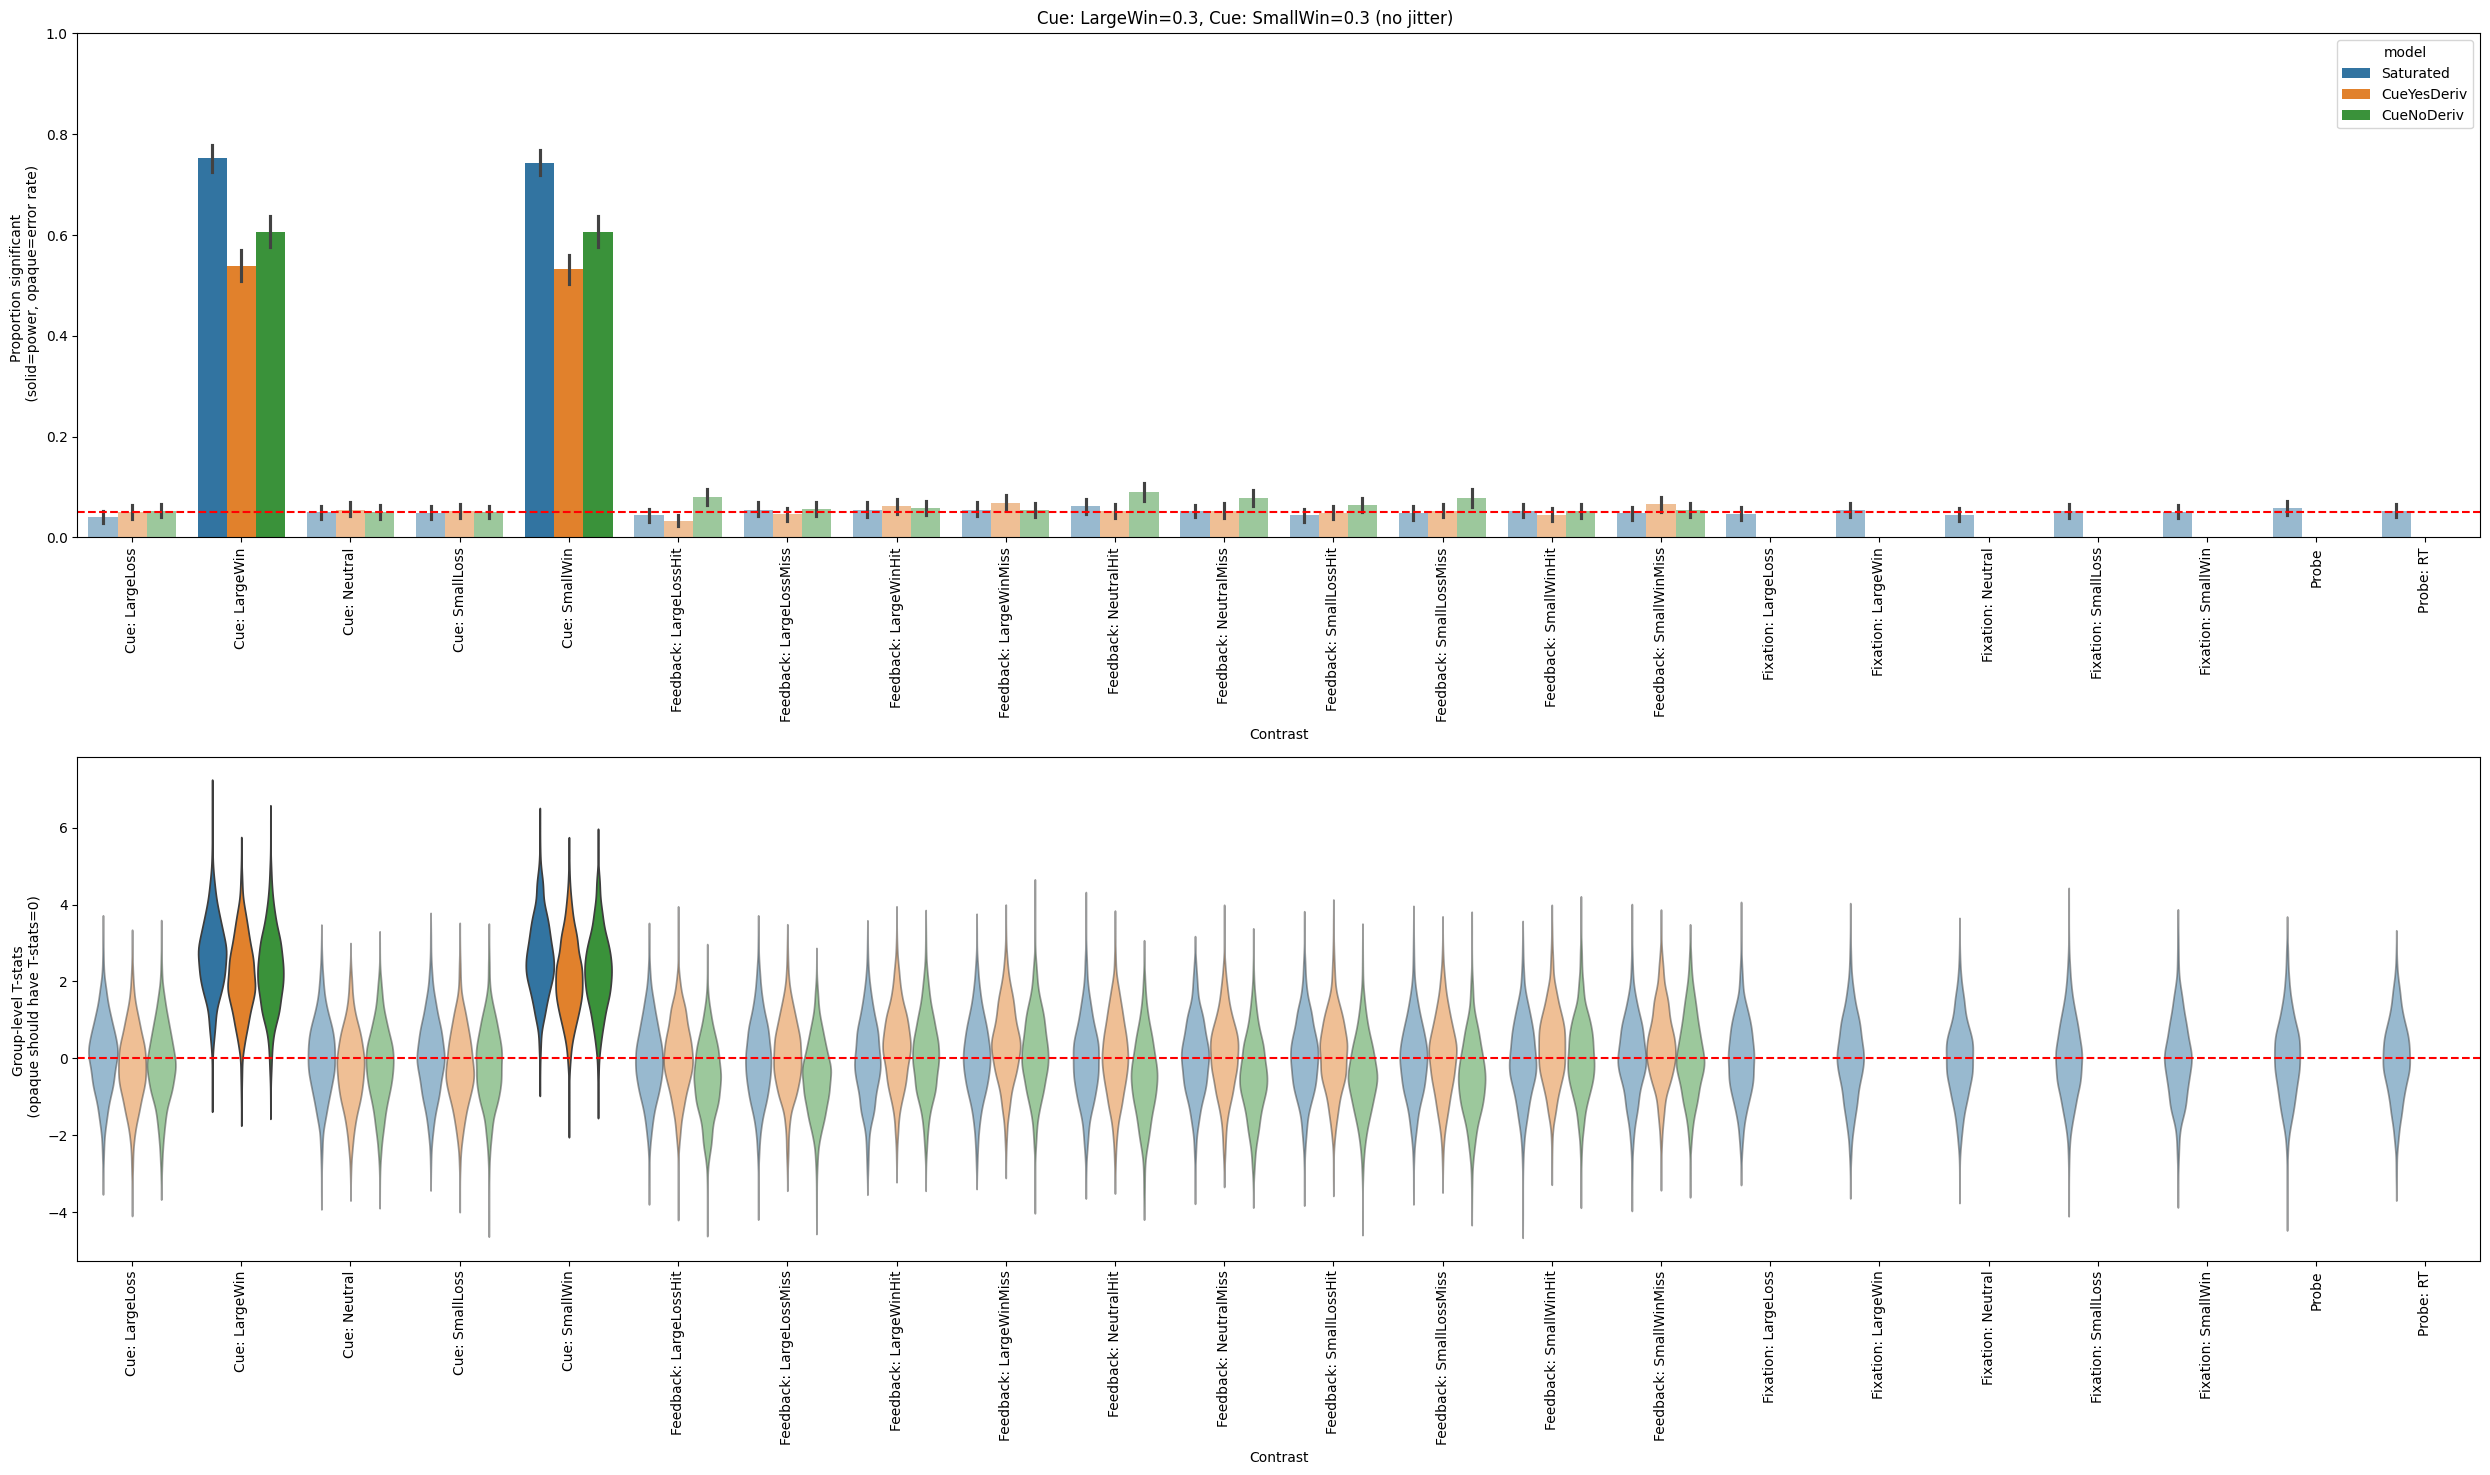

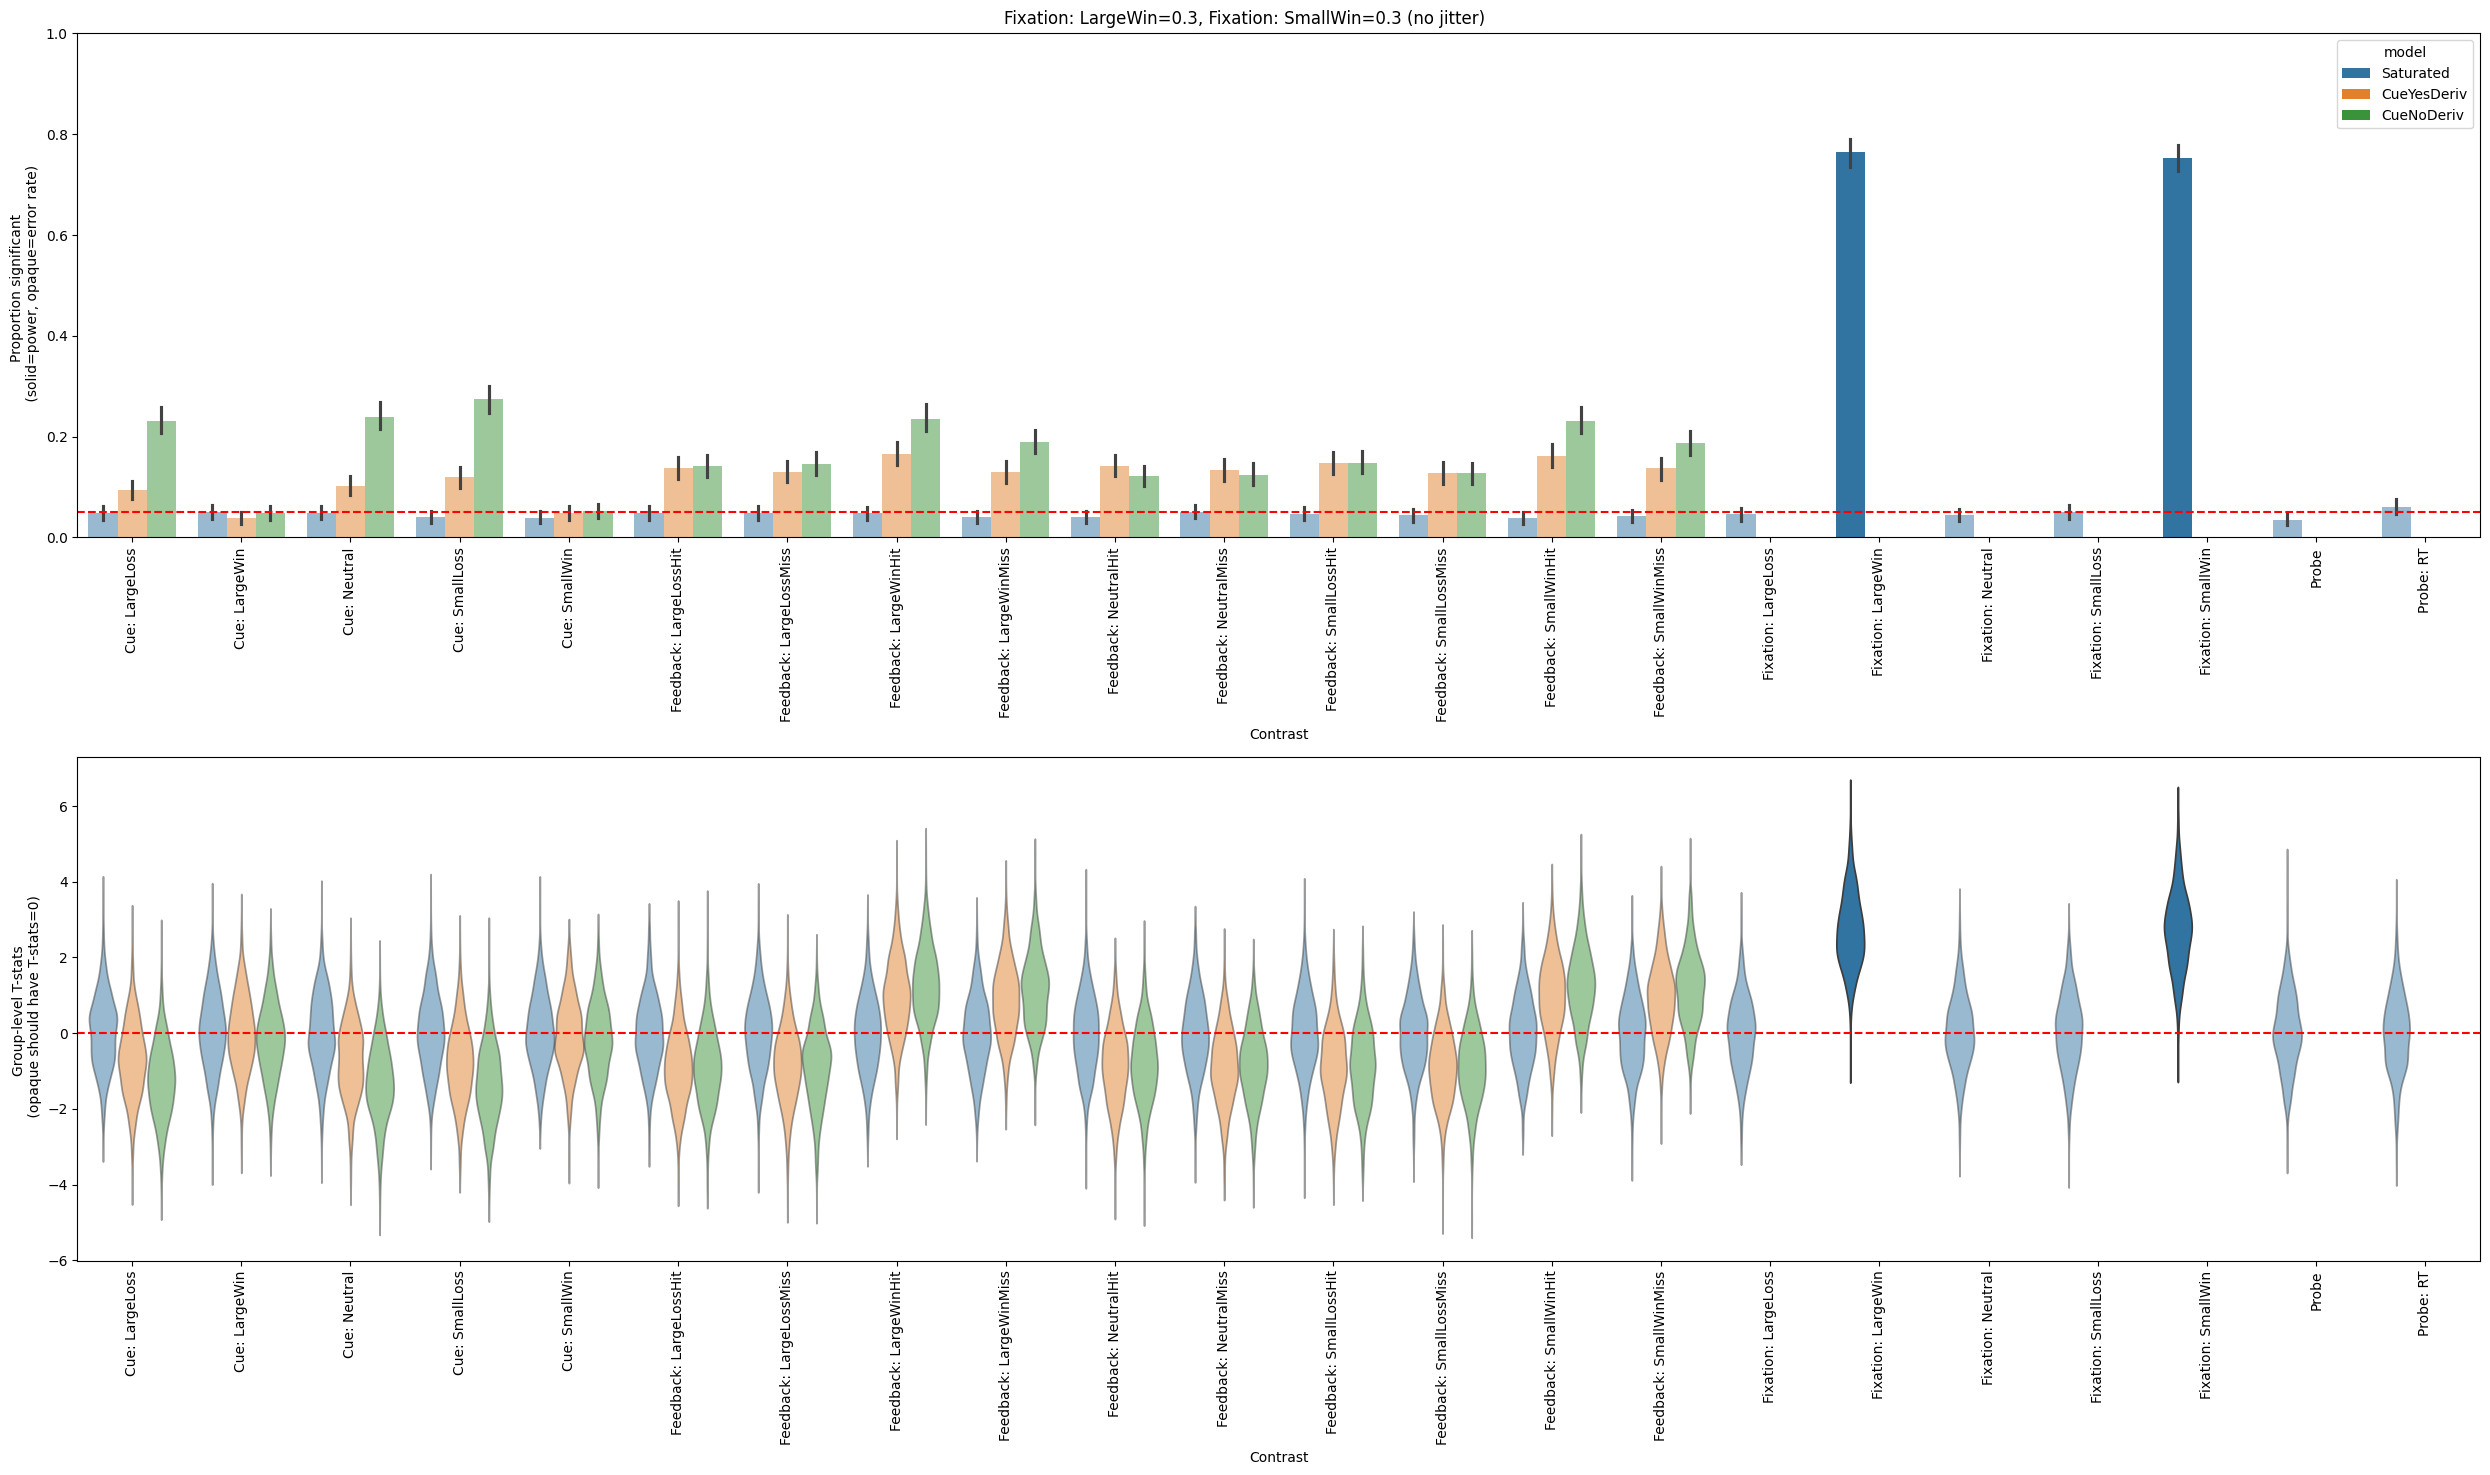

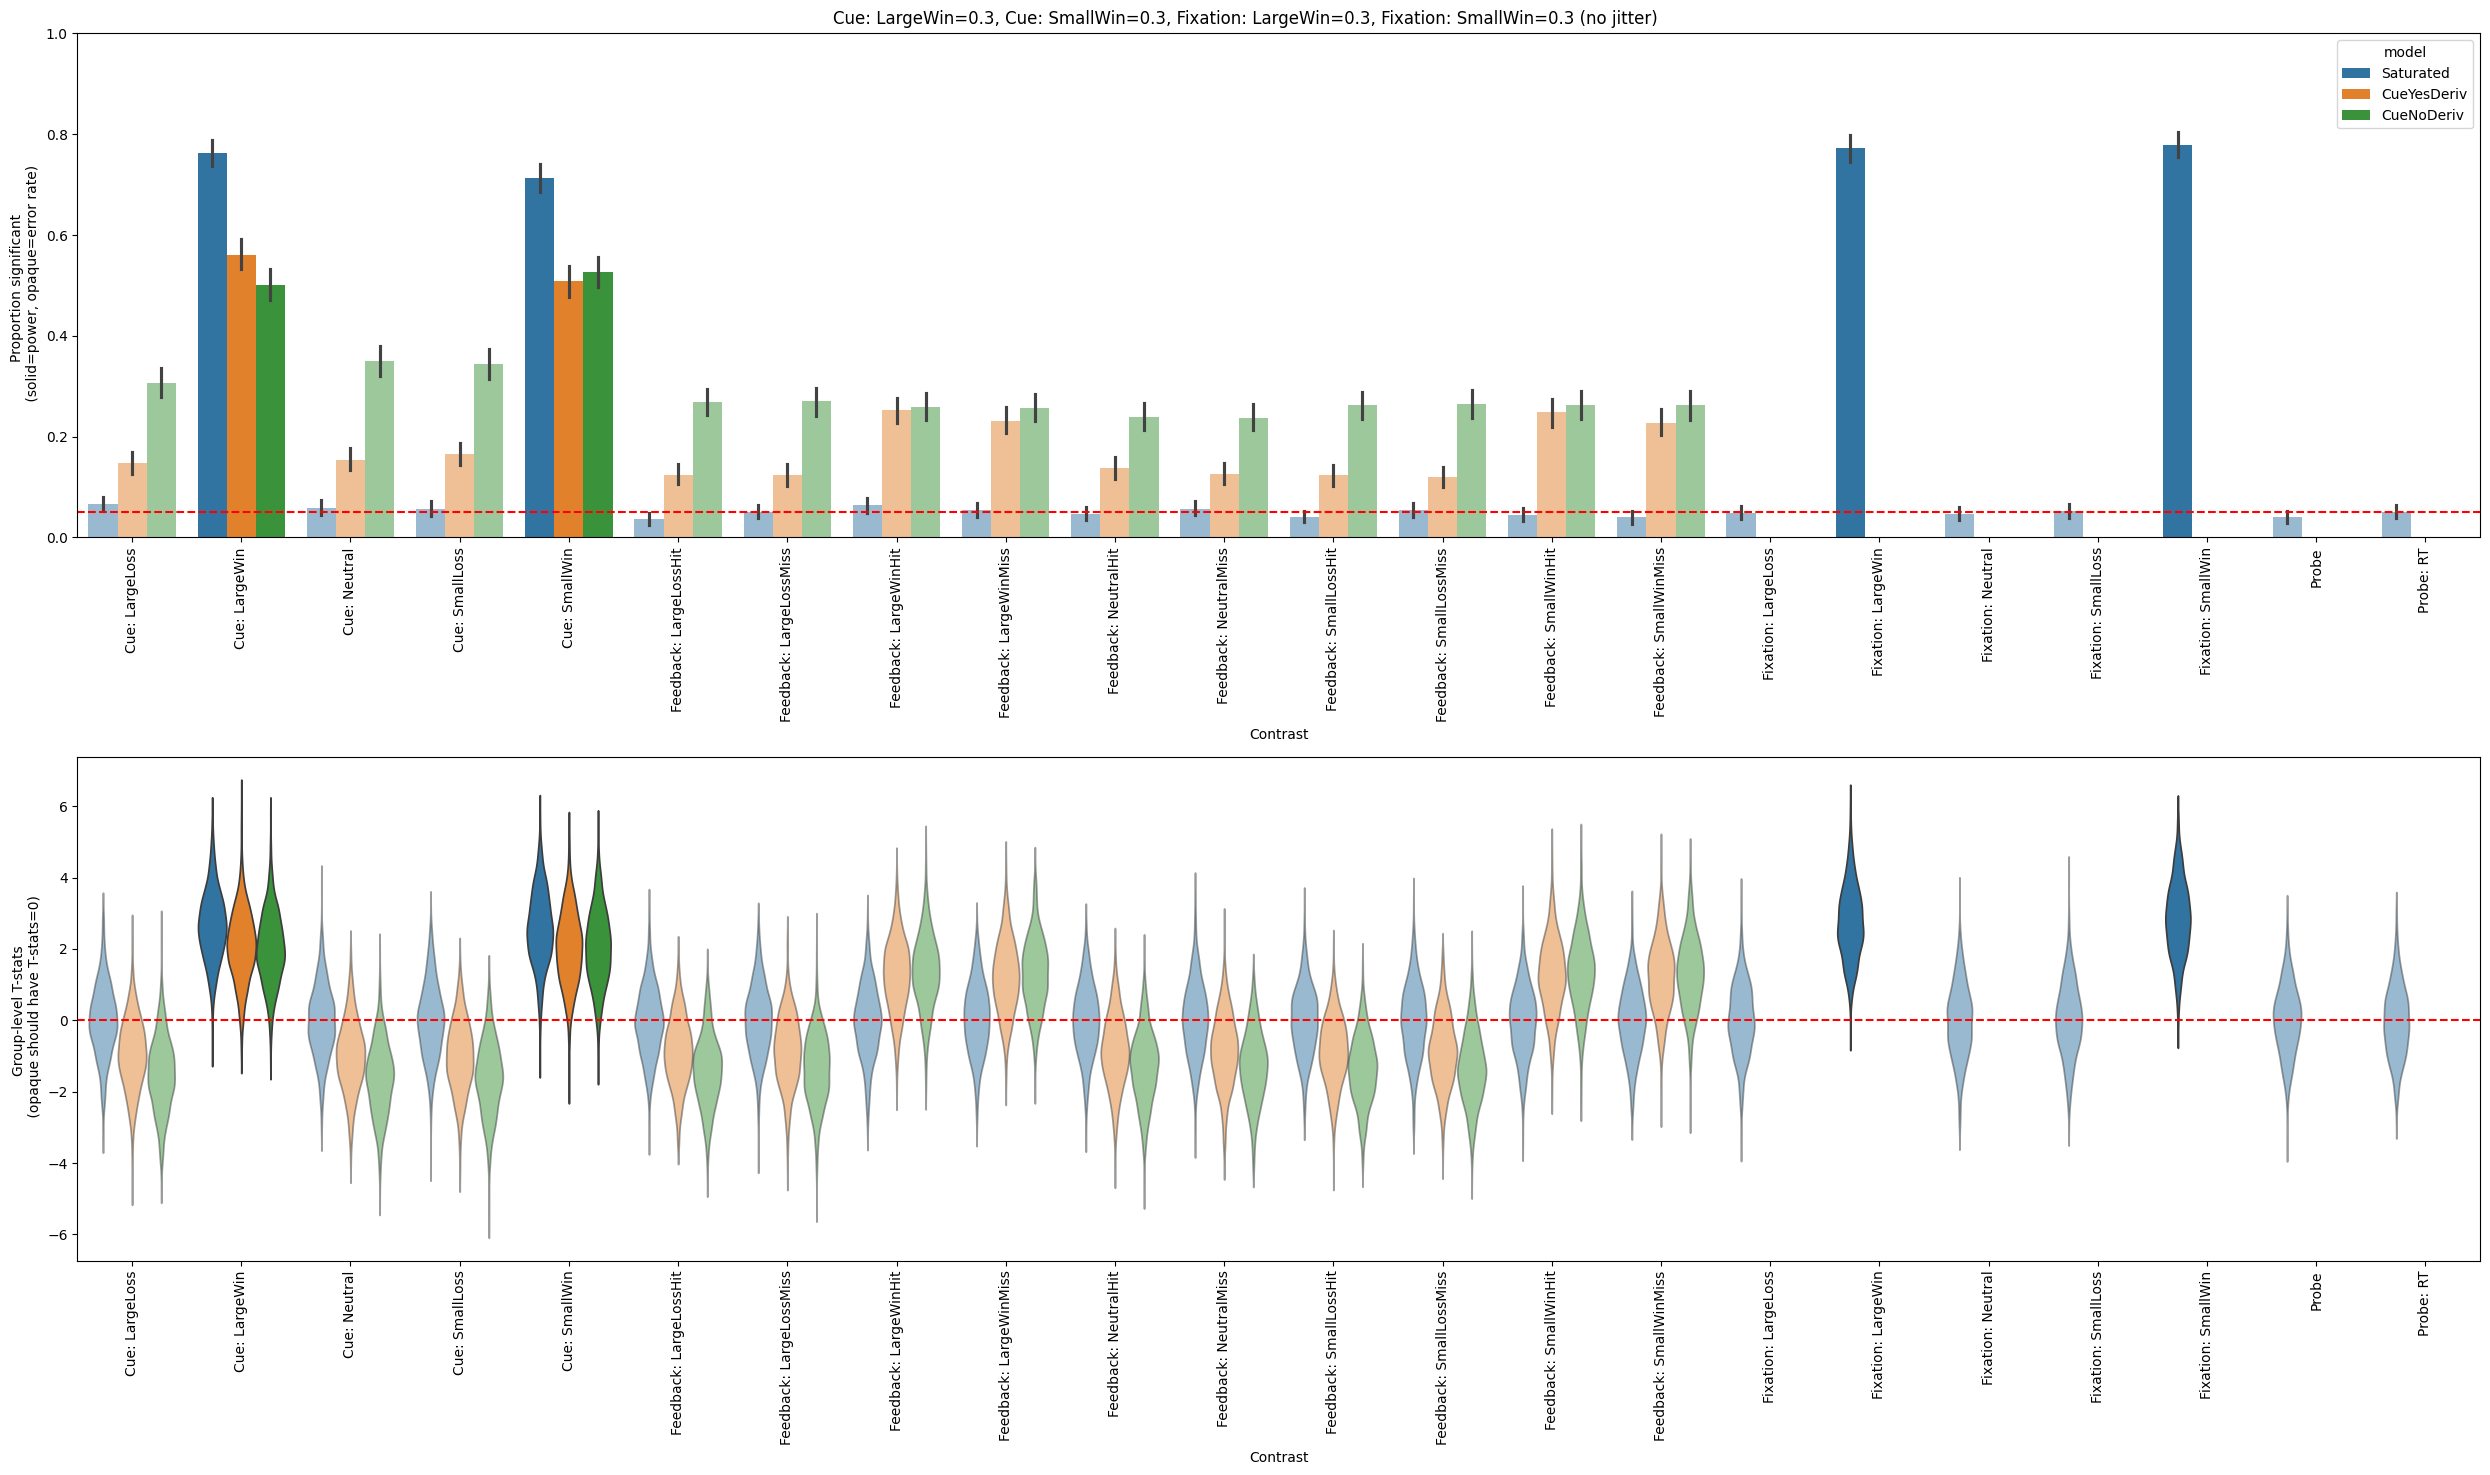

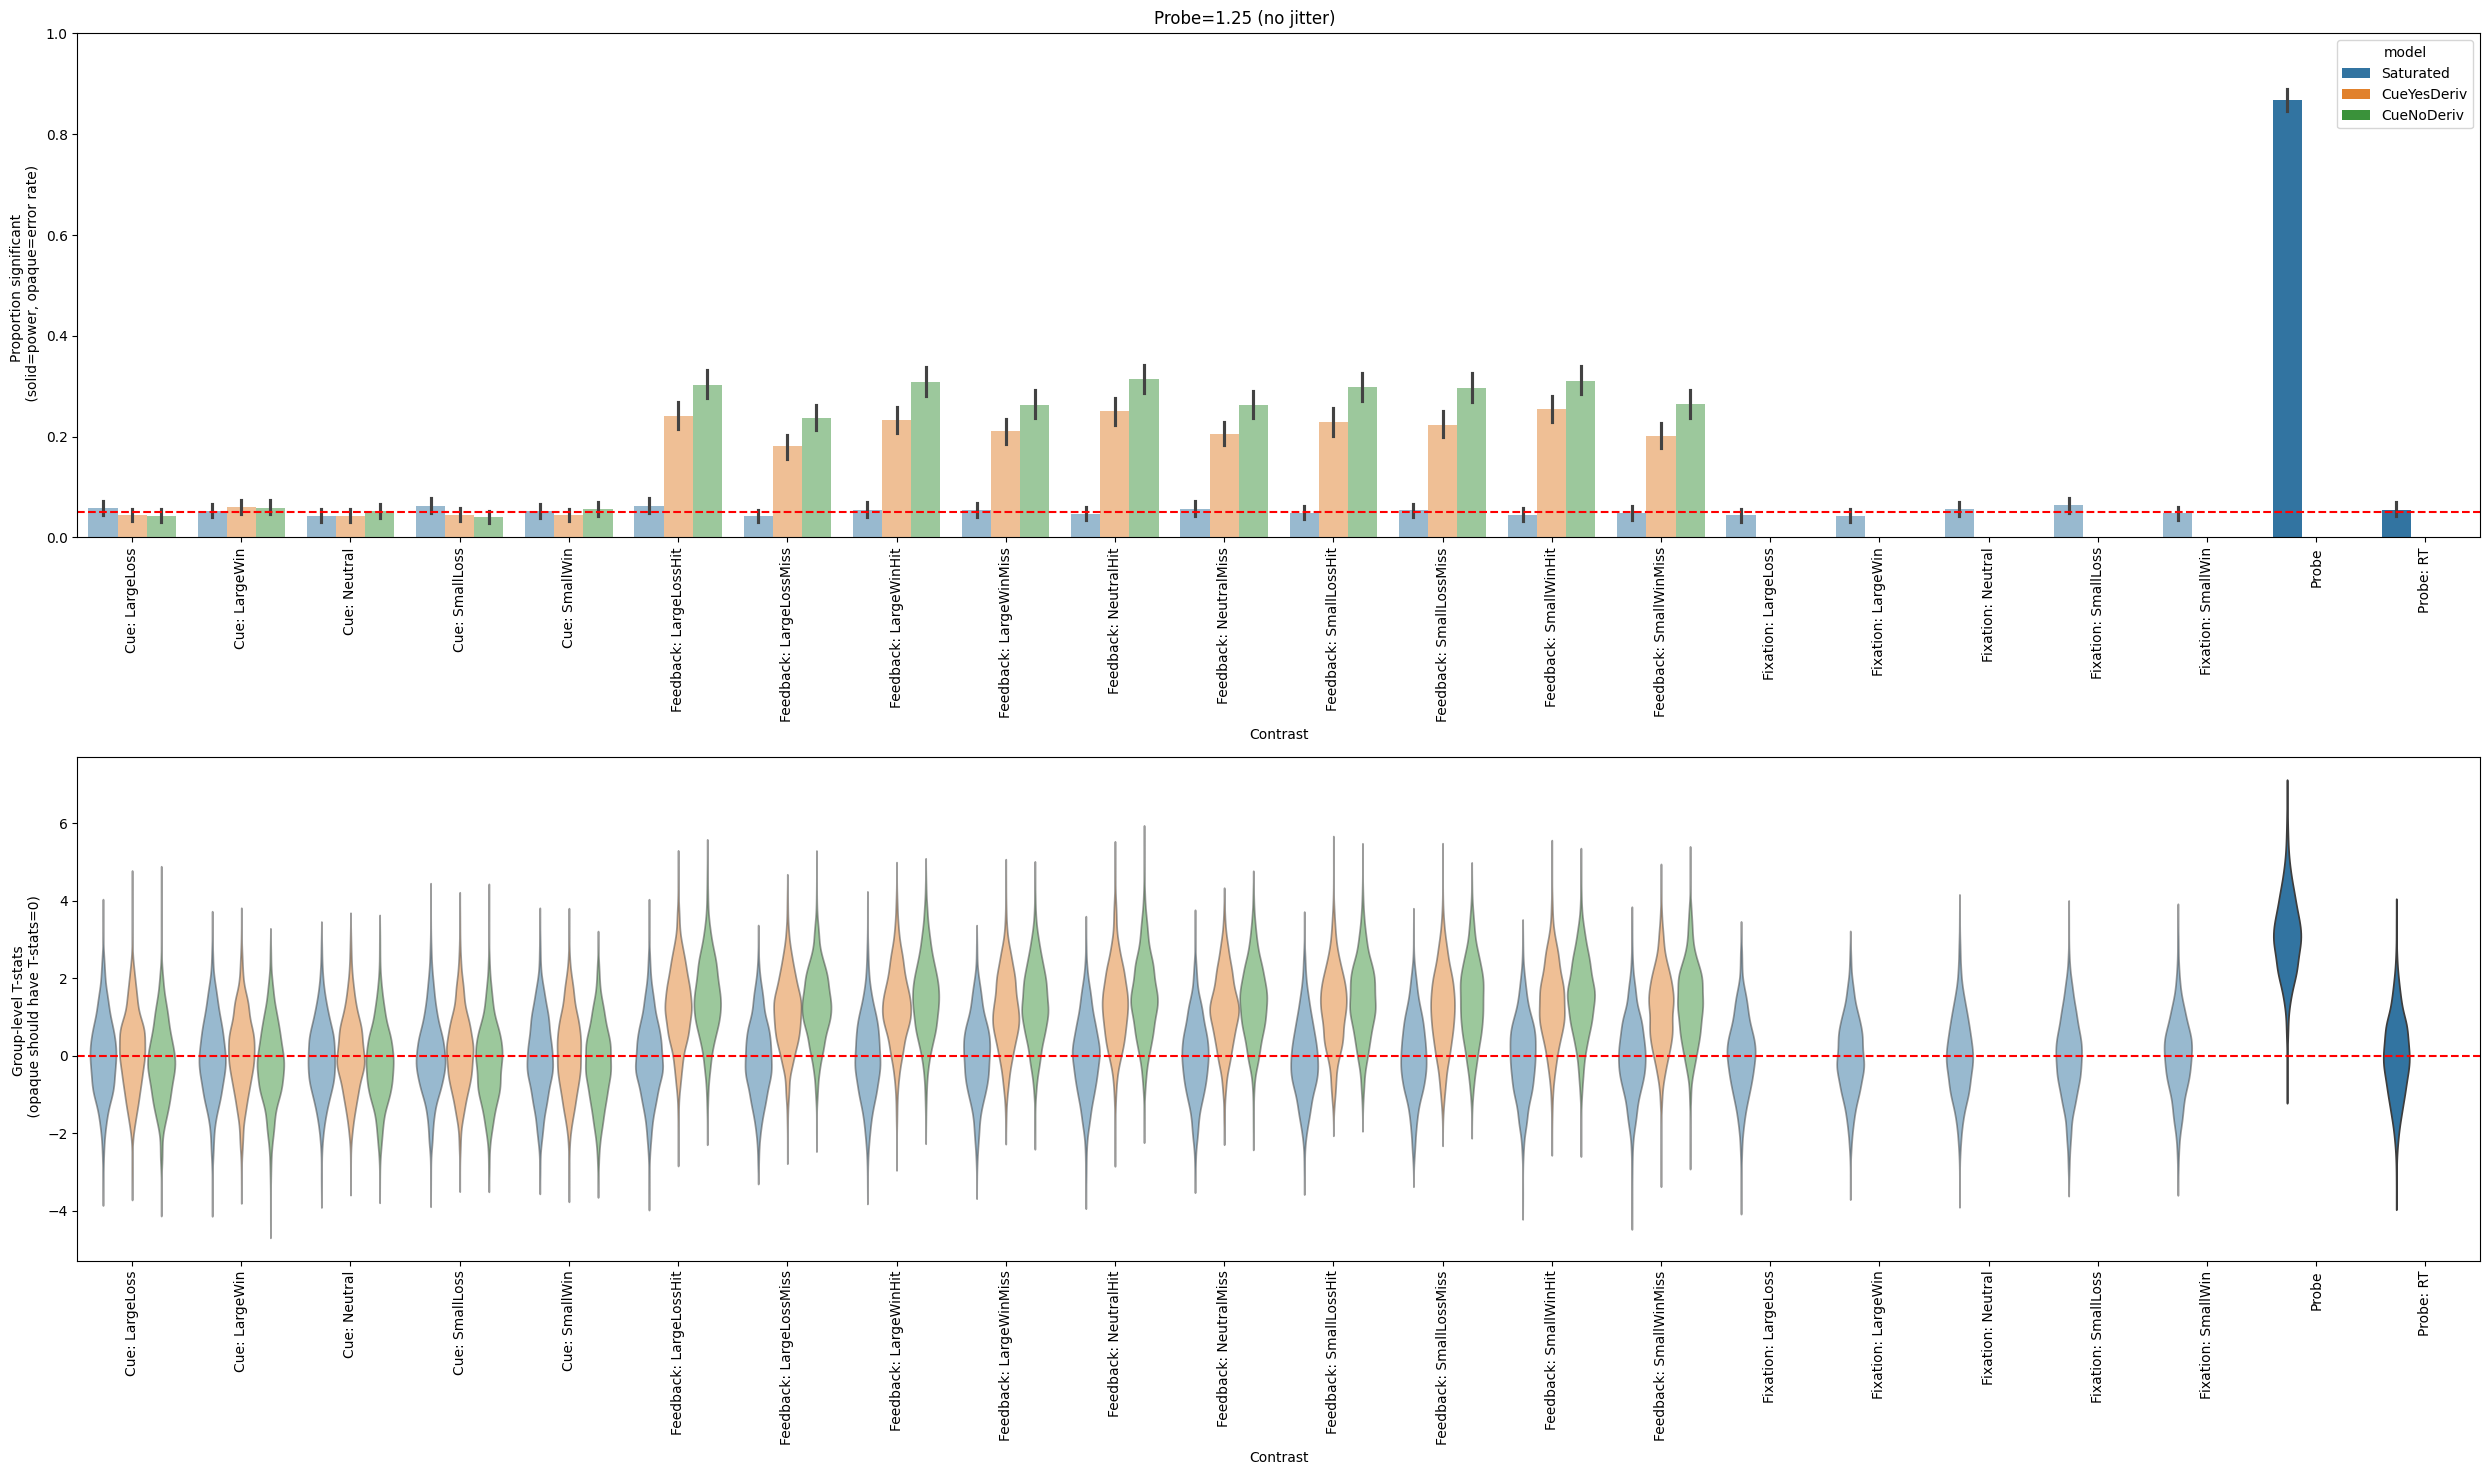

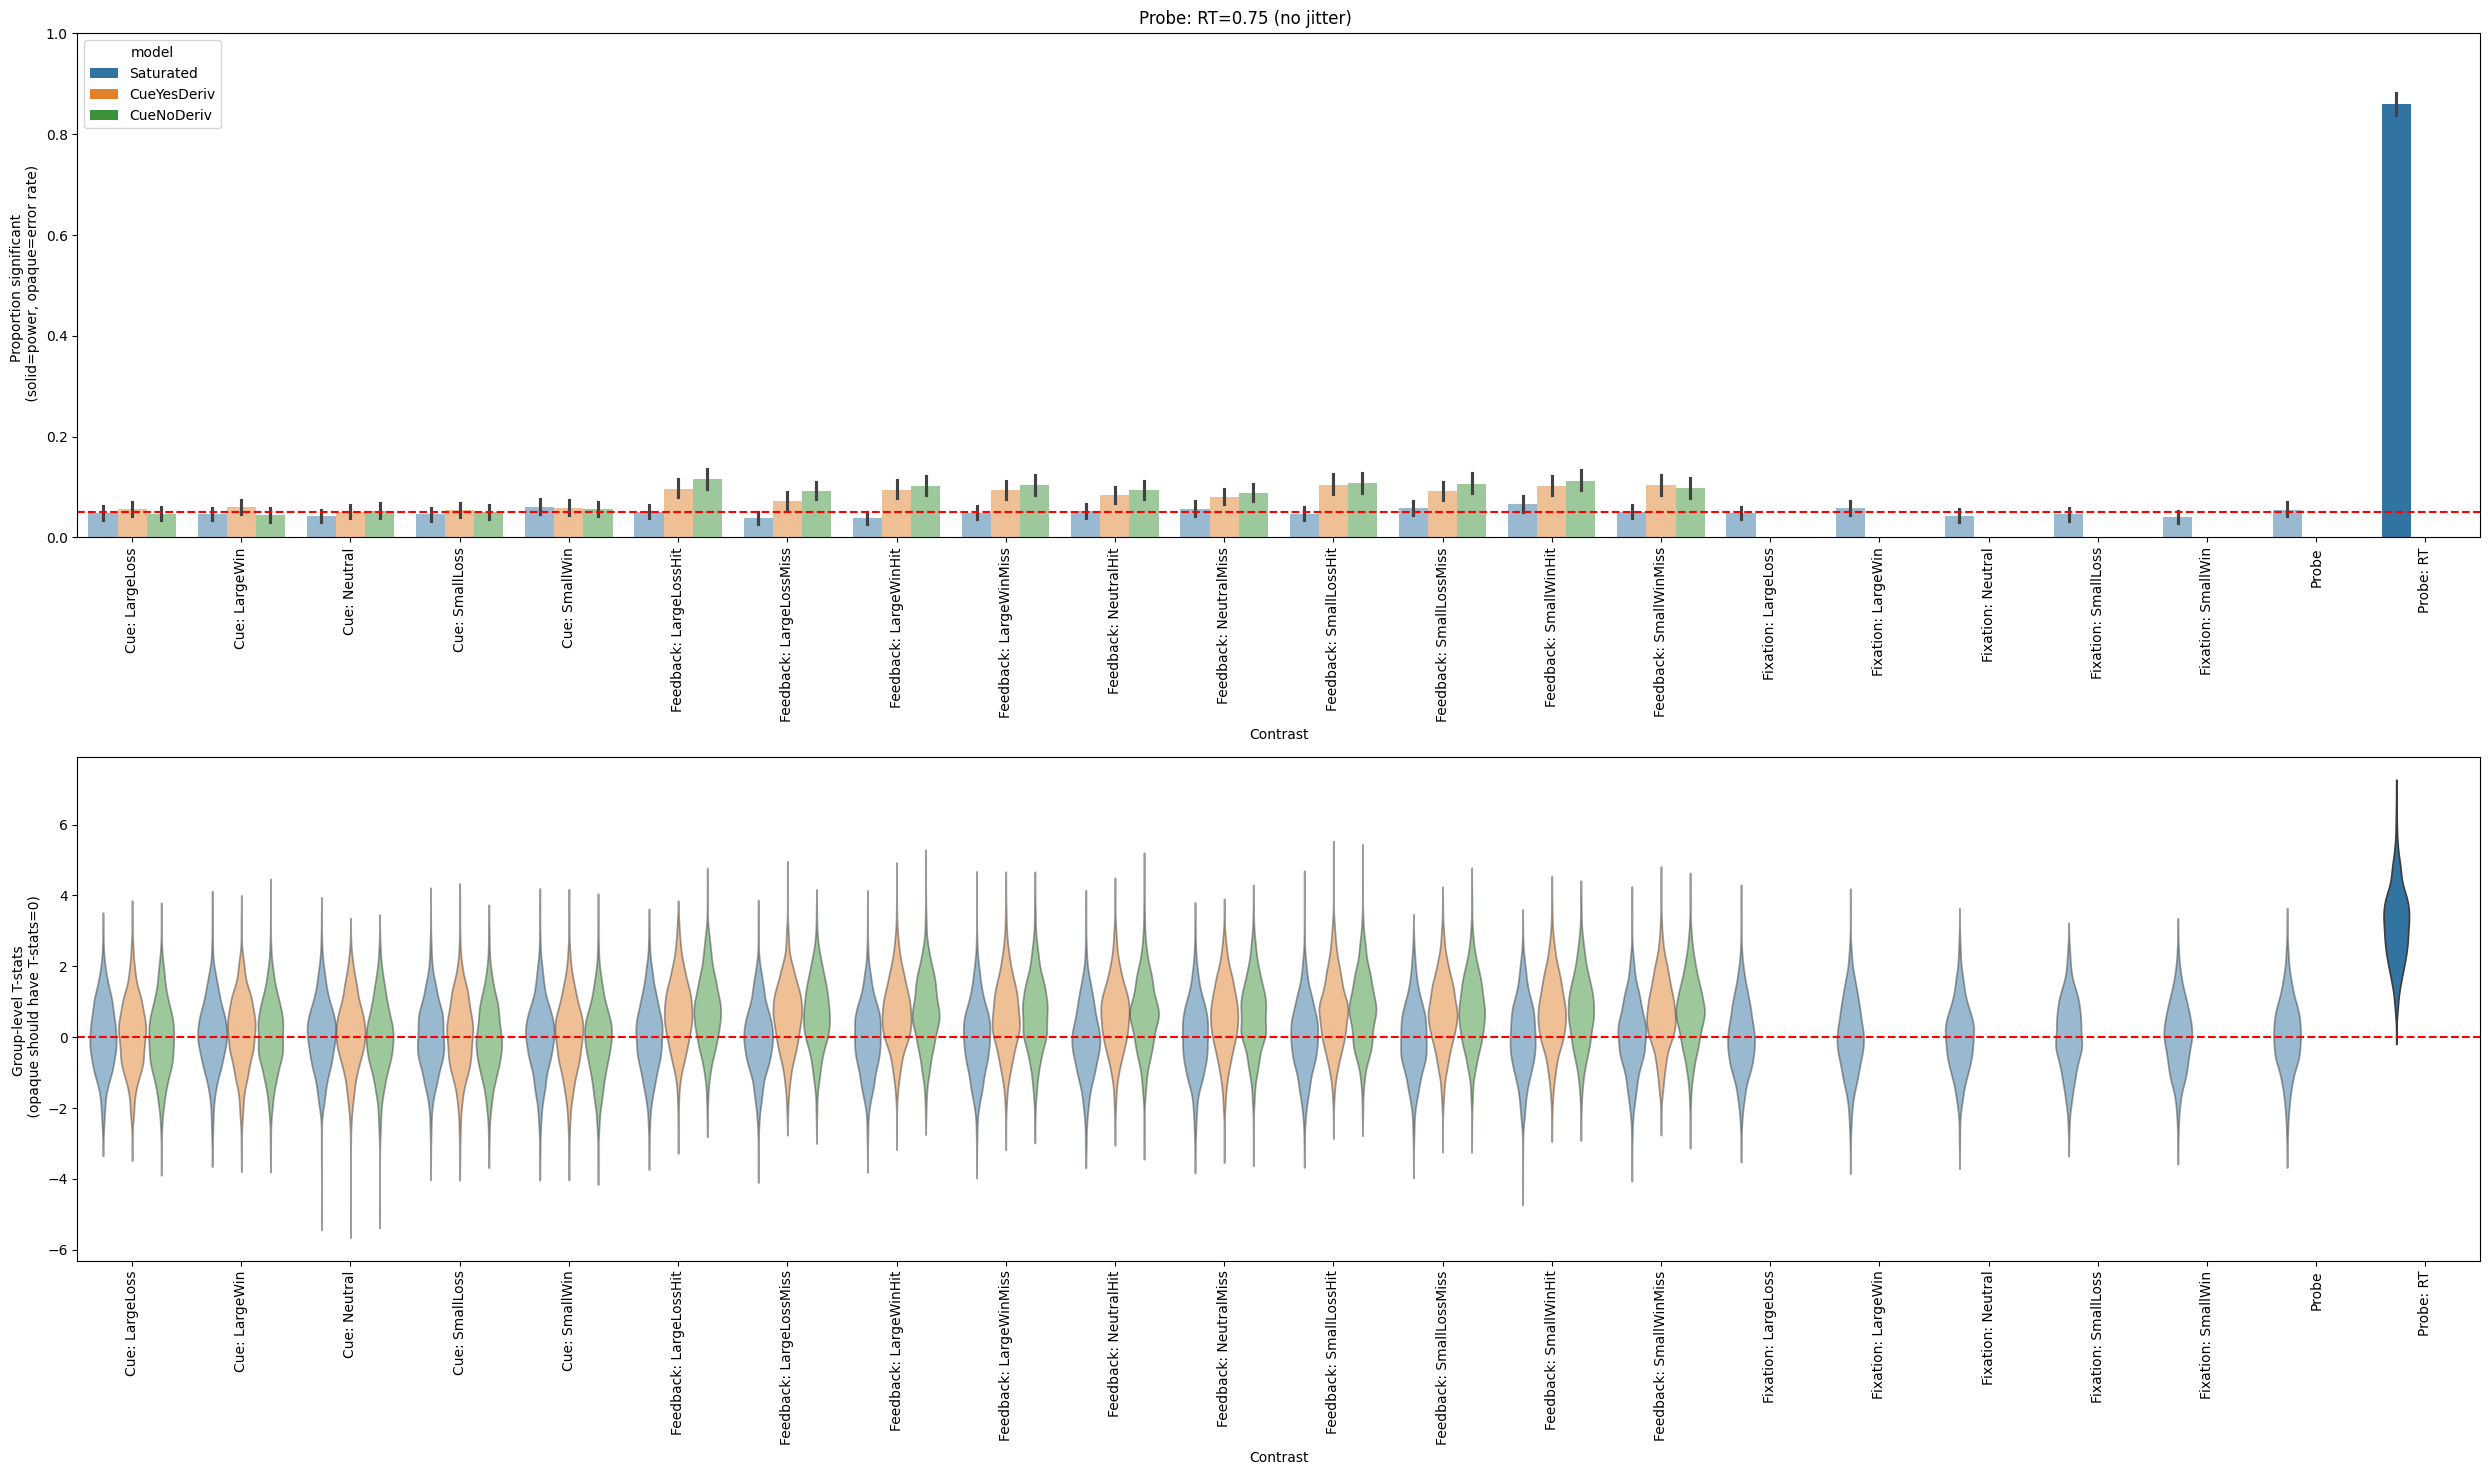

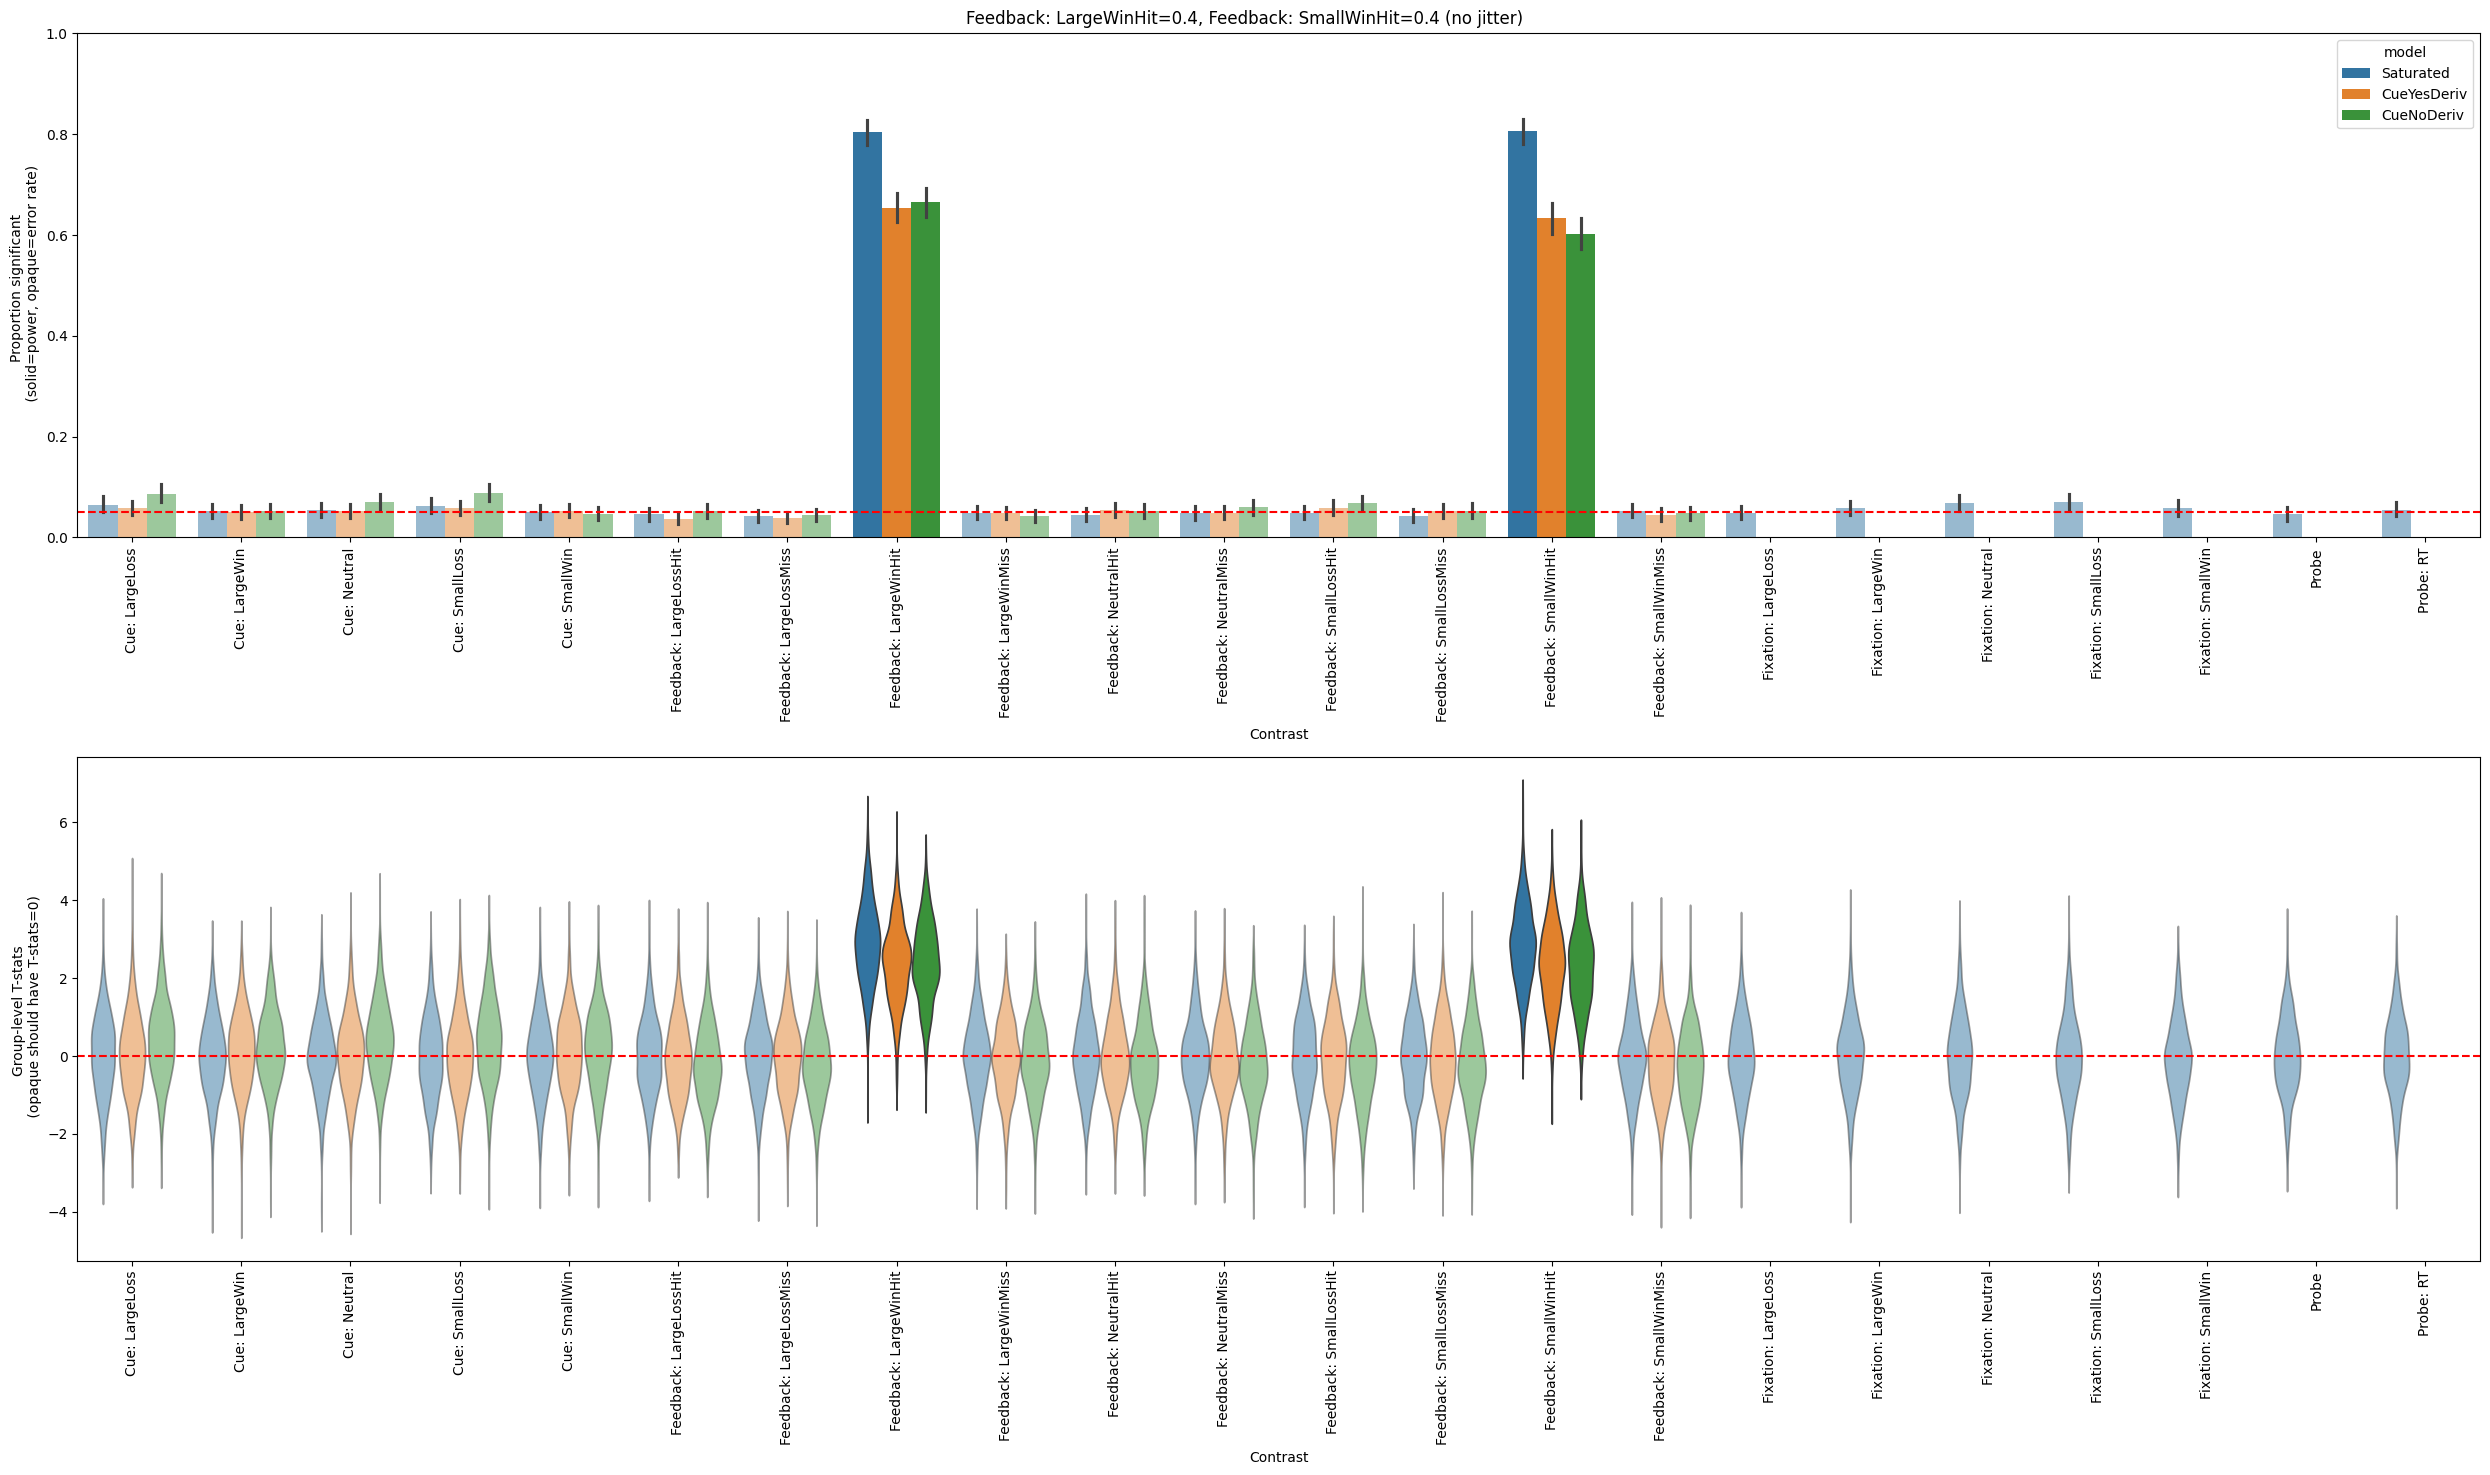

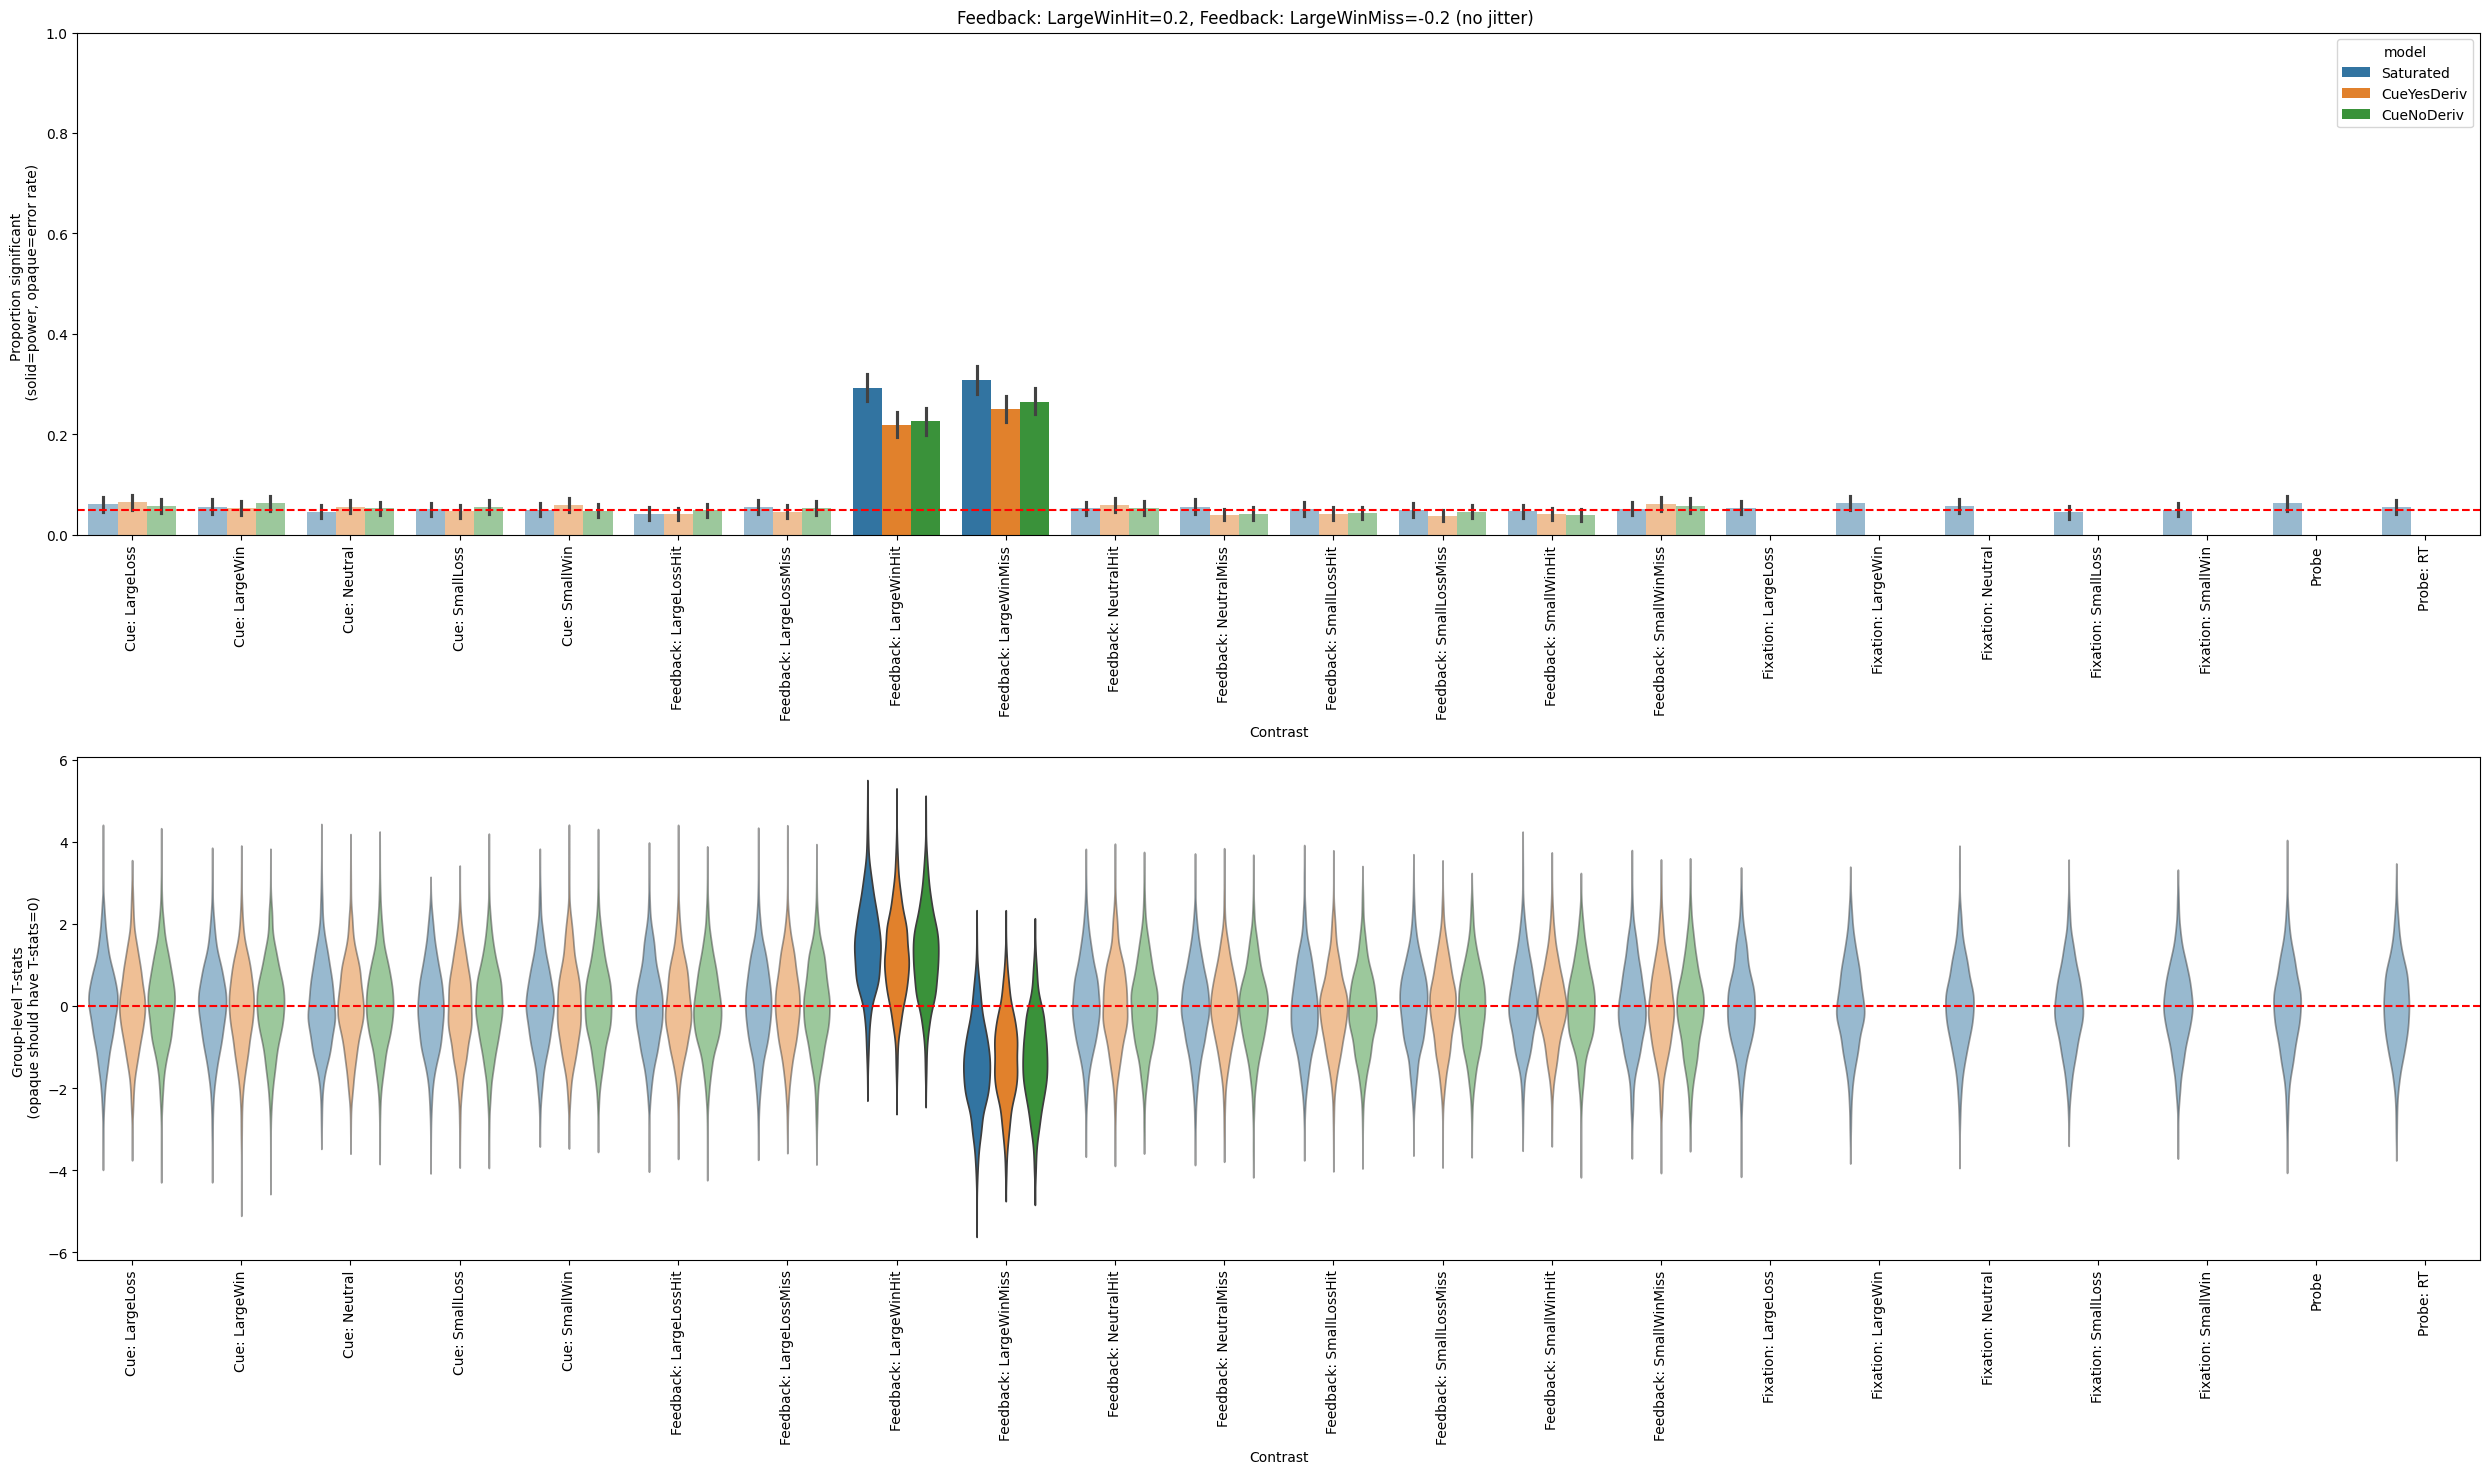

In [8]:
for name, result in results.items():
    result_loop = result[
        ~result['contrast'].str.contains('-|Derivative')
    ].copy()
    plot_results(result_loop, f'{name} (no jitter)', stacked=True)

In [9]:
results

{'Null model':              model          contrast       mean      tval      pval   sigp  \
 0        Saturated    Cue: LargeLoss   0.058524  0.520741  0.603710  False   
 1        Saturated    Cue: LargeLoss  -0.059994 -0.520446  0.603915  False   
 2        Saturated    Cue: LargeLoss   0.070804  0.590884  0.555945  False   
 3        Saturated    Cue: LargeLoss   0.029273  0.277625  0.781879  False   
 4        Saturated    Cue: LargeLoss  -0.026305 -0.224482  0.822845  False   
 ...            ...               ...        ...       ...       ...    ...   
 81995  CueYesDeriv  FB: LWHit-LWMiss  -9.219476 -0.635799  0.526375  False   
 81996  CueYesDeriv  FB: LWHit-LWMiss  -6.326003 -0.401822  0.688681  False   
 81997  CueYesDeriv  FB: LWHit-LWMiss -12.639919 -0.694562  0.488957  False   
 81998  CueYesDeriv  FB: LWHit-LWMiss -26.984882 -2.005147  0.047677   True   
 81999  CueYesDeriv  FB: LWHit-LWMiss -28.745636 -1.825459  0.070947  False   
 
        plot_alpha_val_power_error  

In [10]:
def plot_bias(results, contrasts_only=False, omit_noderiv=False, jitter=False):
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    cmap.set_bad('lightgrey')

    if jitter:
        title = 'Bias (jittered ITI)'
    else:
        title = 'Bias (no ITI)'

    num_plots = len(results.keys())
    f, axs = plt.subplots(
        len(results.keys()),
        1,  # gridspec_kw={'hspace': 0.5},
        figsize=(20, 10),
        sharex=True,
    )
    cbar_ax = f.add_axes([0.91, 0.4, 0.03, 0.5])
    f.suptitle(
        f'{title} \nAverage of group T-statistics across simulations \nBias occurs when values are nonzero',
        fontsize=16,
    )
    if contrasts_only:
        omit_string = 'Derivative|Cue:|Feedback:|Fixation:|Probe'
    else:
        omit_string = 'Derivative'
    for idx, (setting, data) in enumerate(results.items()):
        data = data.copy()
        data.loc[data['plot_alpha_val_power_error'] == 1, 'tval'] = np.nan
        setting = setting.replace(', ', '\n')
        dat_plot = (
            data.groupby(['contrast', 'model'])[['tval']]
            .mean()
            .reset_index()
            .pivot(index='contrast', columns='model', values='tval')
            .transpose()
        )
        dat_plot = dat_plot[
            dat_plot.columns.drop(list(dat_plot.filter(regex=omit_string)))
        ]
        if omit_noderiv:
            dat_plot = dat_plot.loc[~dat_plot.index.str.contains('NoDeriv')]
        dat_plot = dat_plot[
            sorted(dat_plot.columns, key=lambda x: ('-' in x, x))
        ]
        g = sns.heatmap(
            dat_plot,
            vmin=-0.5,
            vmax=1,
            center=0,
            cbar=idx == 0,
            cmap=cmap,
            ax=axs[idx],
            cbar_ax=None if idx else cbar_ax,
            annot=True,
            fmt='.2f',
        )
        if idx < num_plots - 1:
            axs[idx].set_xlabel('')
        axs[idx].set_ylabel(setting, rotation=0, labelpad=200, loc='bottom')
    plt.show()

In [11]:
def plot_error_grid(results, omit_noderiv=False, jitter=False):
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    cmap.set_bad('lightgrey')
    if jitter:
        title = 'Type I error (jittered ITI)'
    else:
        title = 'Type I error (no ITI)'
    num_plots = len(results.keys())
    f, axs = plt.subplots(
        len(results.keys()),
        1,  # gridspec_kw={'hspace': 0.5},
        figsize=(20, 10),
        sharex=True,
    )
    cbar_ax = f.add_axes([0.91, 0.4, 0.03, 0.5])
    f.suptitle(f'{title}', fontsize=16)
    for idx, (setting, data) in enumerate(results.items()):
        data = data.copy()
        data['sigp'] = data['sigp'].astype(float)
        data.loc[data['plot_alpha_val_power_error'] == 1, 'sigp'] = pd.NA
        setting = setting.replace(', ', '\n')
        dat_plot = (
            data.groupby(['contrast', 'model'])[['sigp']]
            .mean()
            .reset_index()
            .pivot(index='contrast', columns='model', values='sigp')
            .transpose()
        )
        dat_plot = dat_plot[
            dat_plot.columns.drop(list(dat_plot.filter(regex='Derivative')))
        ]
        if omit_noderiv:
            dat_plot = dat_plot.loc[~dat_plot.index.str.contains('NoDeriv')]
        dat_plot = dat_plot[
            sorted(dat_plot.columns, key=lambda x: ('-' in x, x))
        ]
        g = sns.heatmap(
            dat_plot,
            vmin=0,
            vmax=1,
            center=0.05,
            cbar=idx == 0,
            cmap=cmap,
            ax=axs[idx],
            cbar_ax=None if idx else cbar_ax,
            annot=True,
            fmt='.2f',
        )
        if idx < num_plots - 1:
            axs[idx].set_xlabel('')
        axs[idx].set_ylabel(setting, rotation=0, labelpad=200, loc='bottom')
    plt.show()

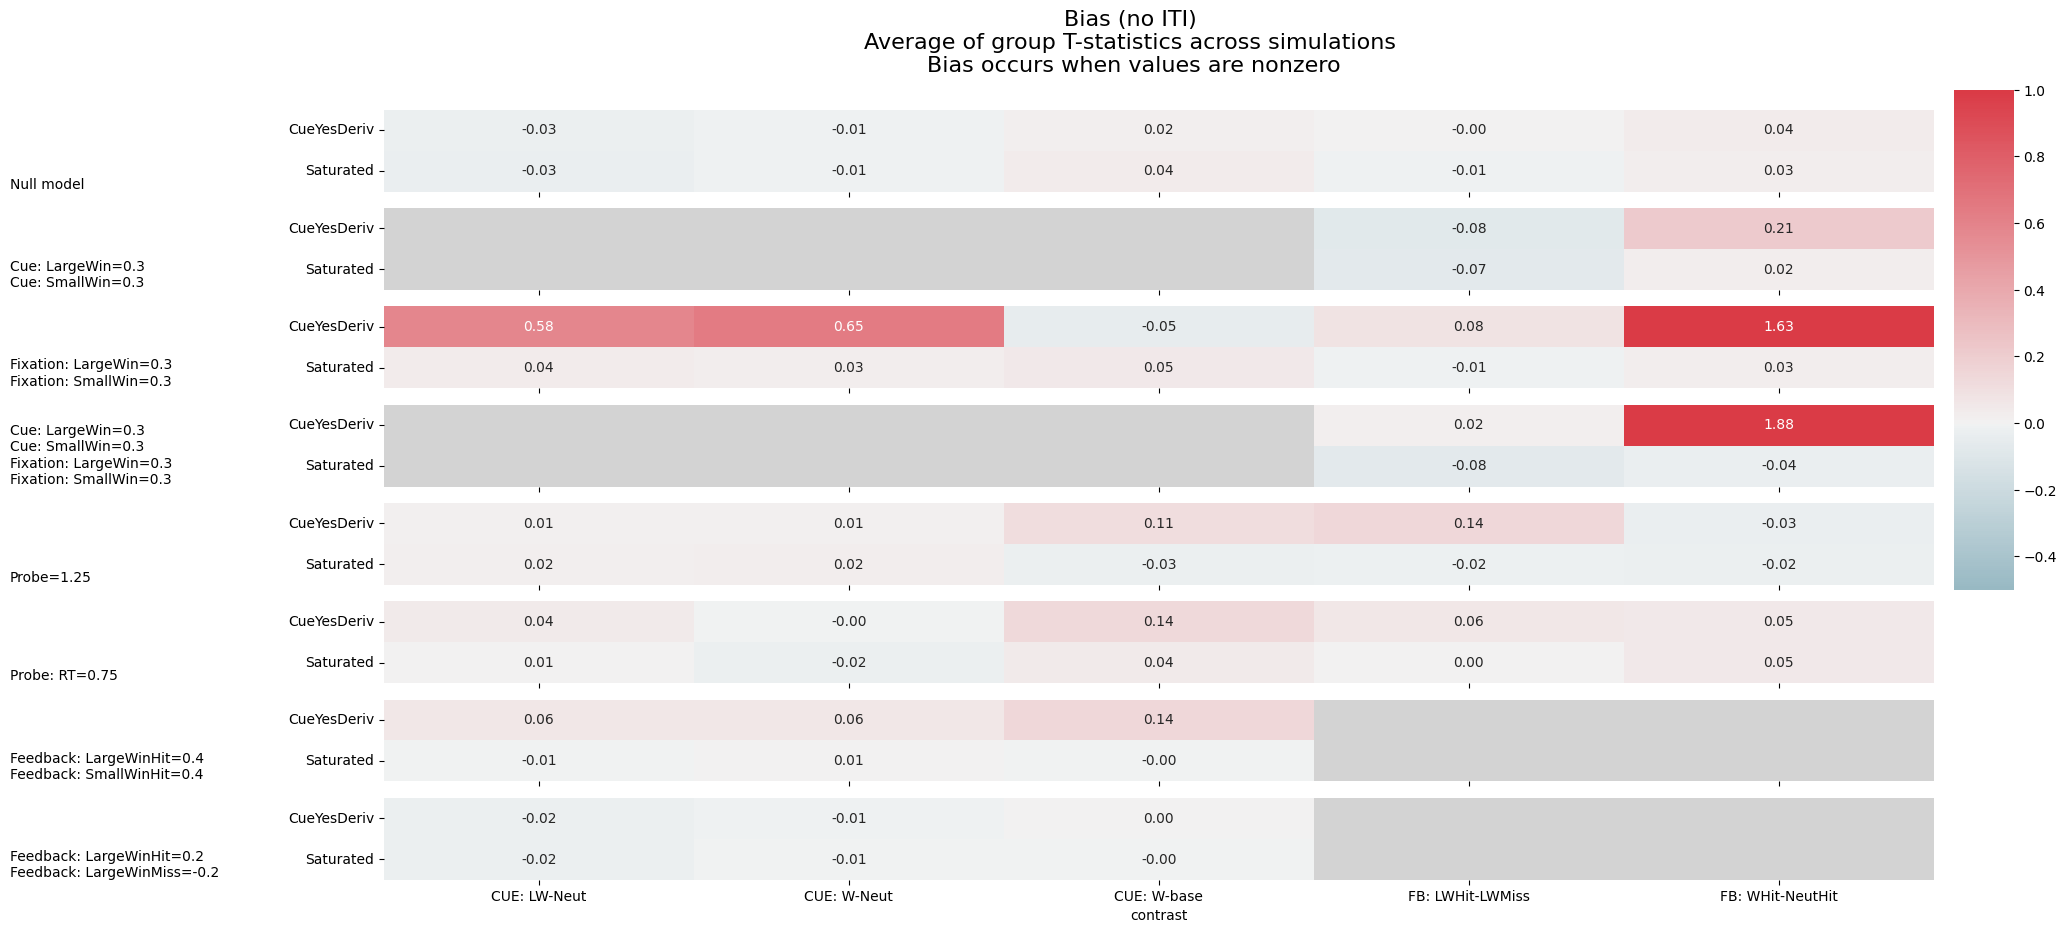

In [12]:
plot_bias(results, contrasts_only=True, omit_noderiv=True, jitter=False)

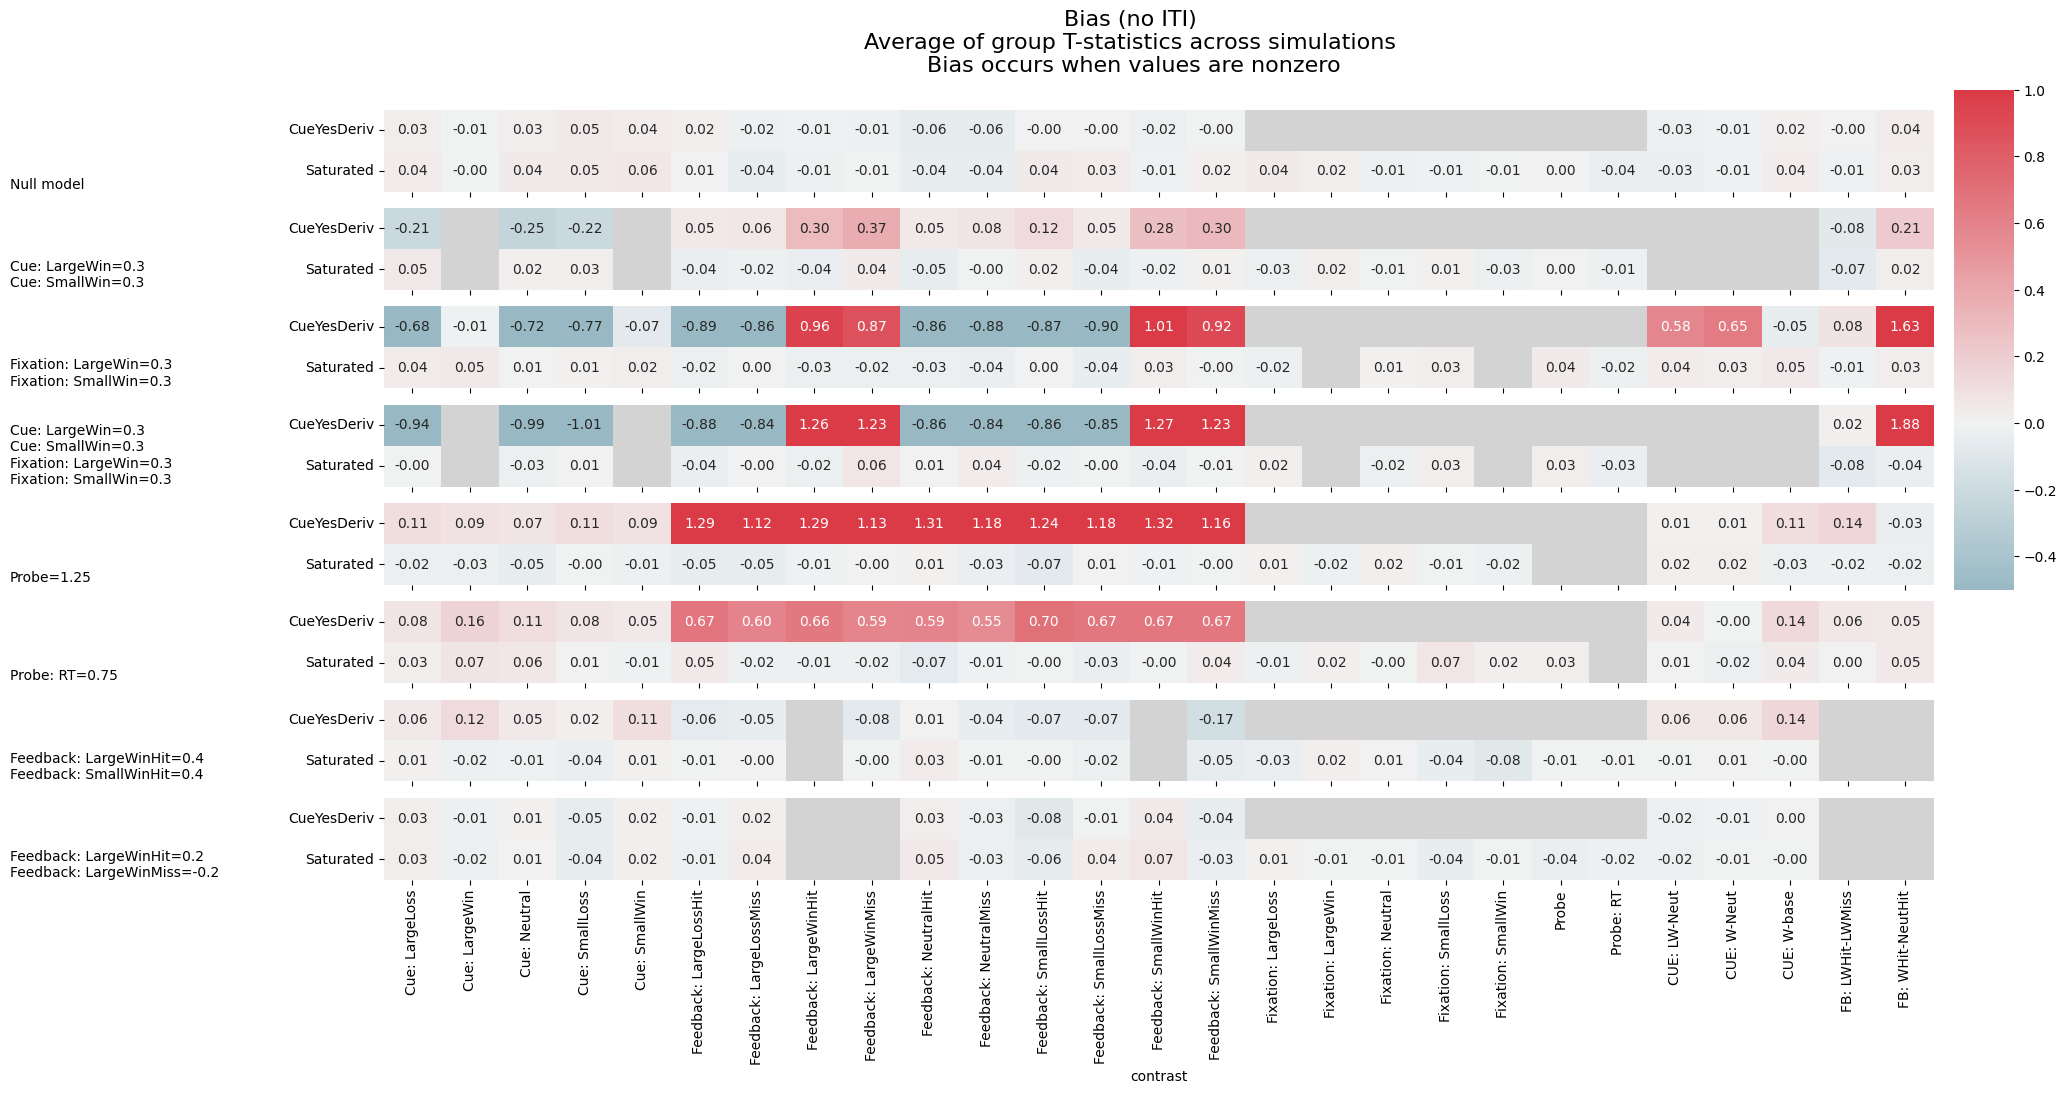

In [13]:
plot_bias(results, omit_noderiv=True, jitter=False)

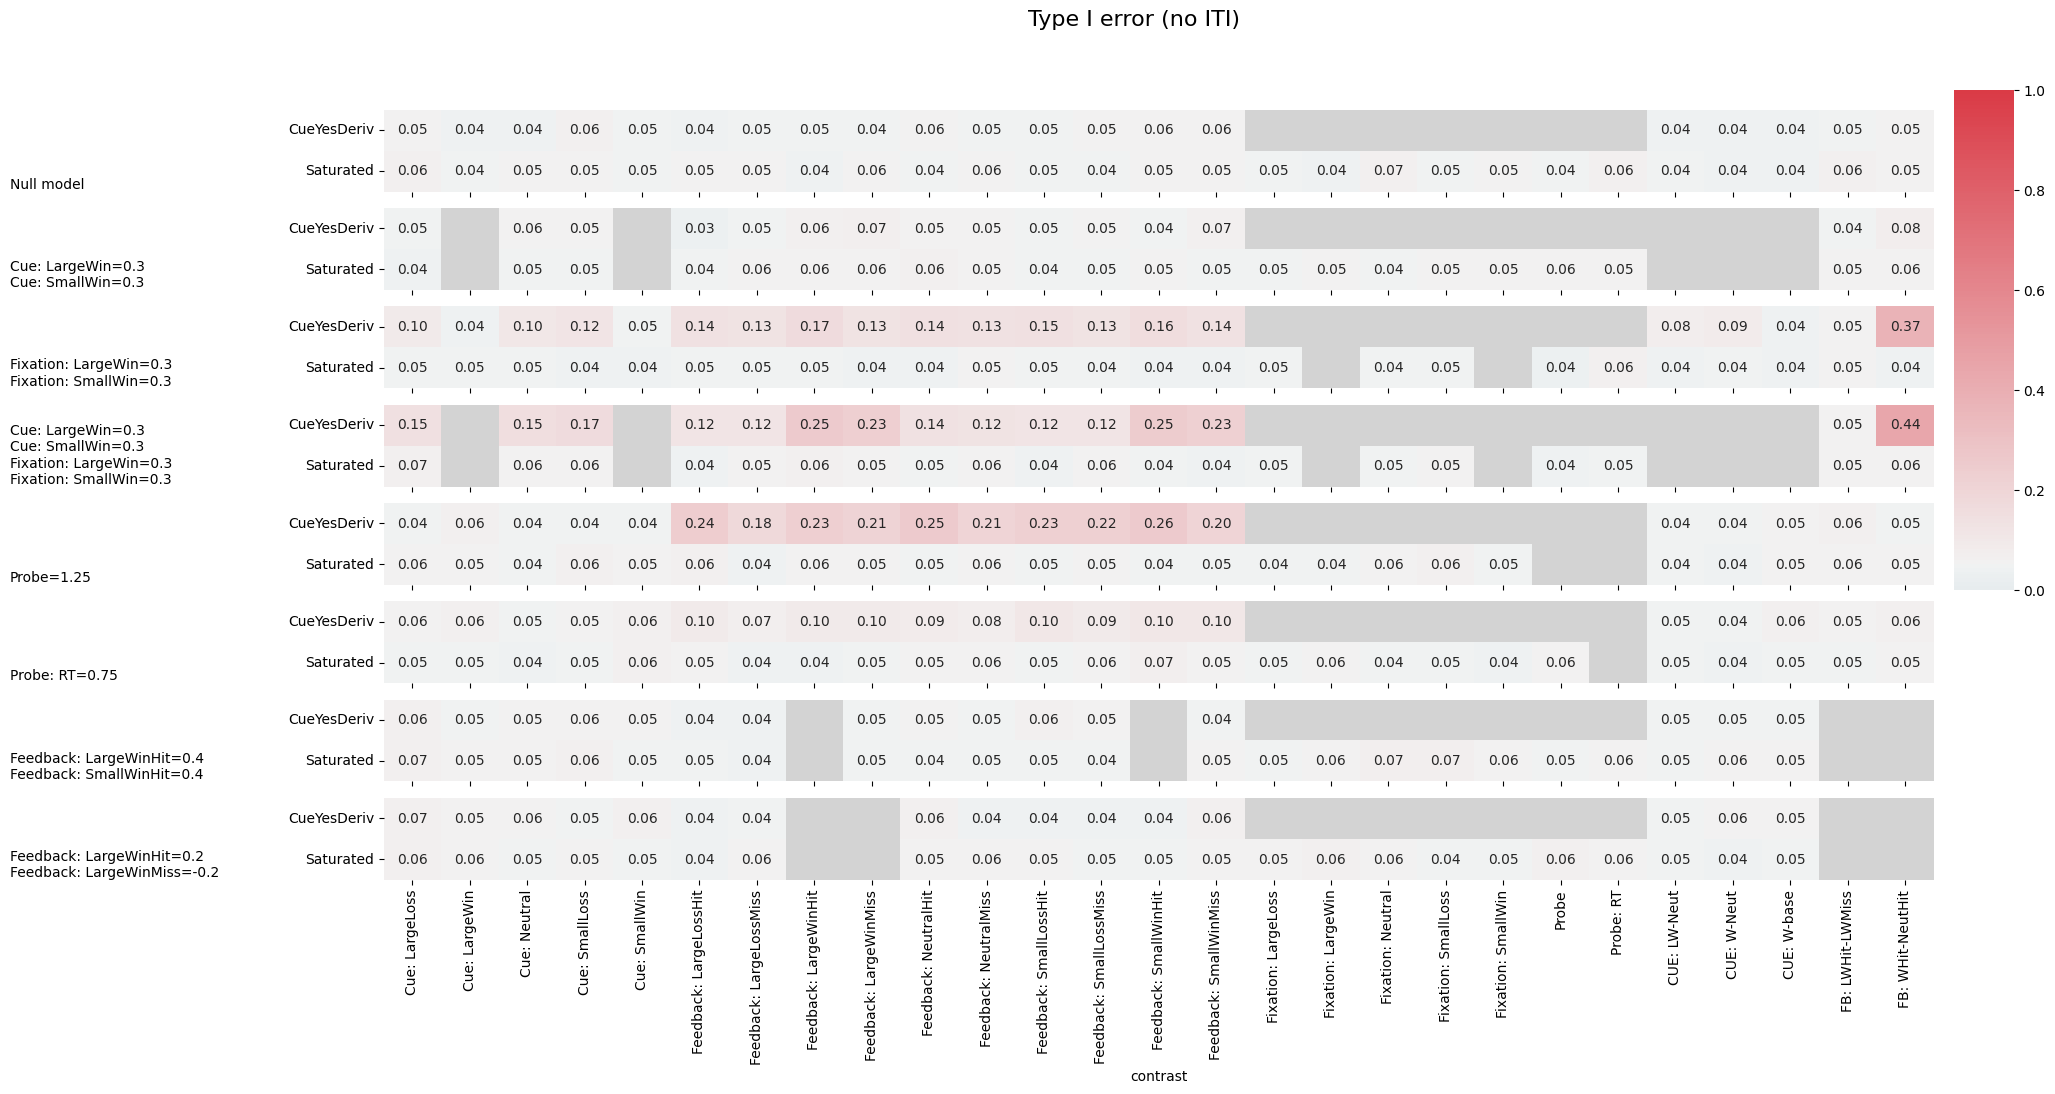

In [14]:
plot_error_grid(results, omit_noderiv=True)

## What if we add jitter?


In [15]:
dataset = 'ABCD'
beta_sub_sd = 1
noise_sd = 1
nsims = 1000

results_jitter = {}

for beta_dict in beta_dicts:
    print(beta_dict)
    figure_label = make_analysis_label(beta_dict)
    (
        results_jitter[figure_label],
        _,
        desmat_example_jitter,
    ) = sim_group_models_parallel(
        beta_dict,
        noise_sd,
        beta_sub_sd,
        nsims=nsims,
        oversampling=5,
        tr=1,
        jitter=True,
        jitter_iti_min=2,
        jitter_iti_max=5,
        dataset=dataset,
        nsubs=100,
    )

{}
{'Cue: LargeWin': 0.3, 'Cue: SmallWin': 0.3}
{'Fixation: LargeWin': 0.3, 'Fixation: SmallWin': 0.3}
{'Cue: LargeWin': 0.3, 'Cue: SmallWin': 0.3, 'Fixation: LargeWin': 0.3, 'Fixation: SmallWin': 0.3}
{'Probe': 1.25}
{'Probe: RT': 0.75}
{'Feedback: LargeWinHit': 0.4, 'Feedback: SmallWinHit': 0.4}
{'Feedback: LargeWinHit': 0.2, 'Feedback: LargeWinMiss': -0.2}


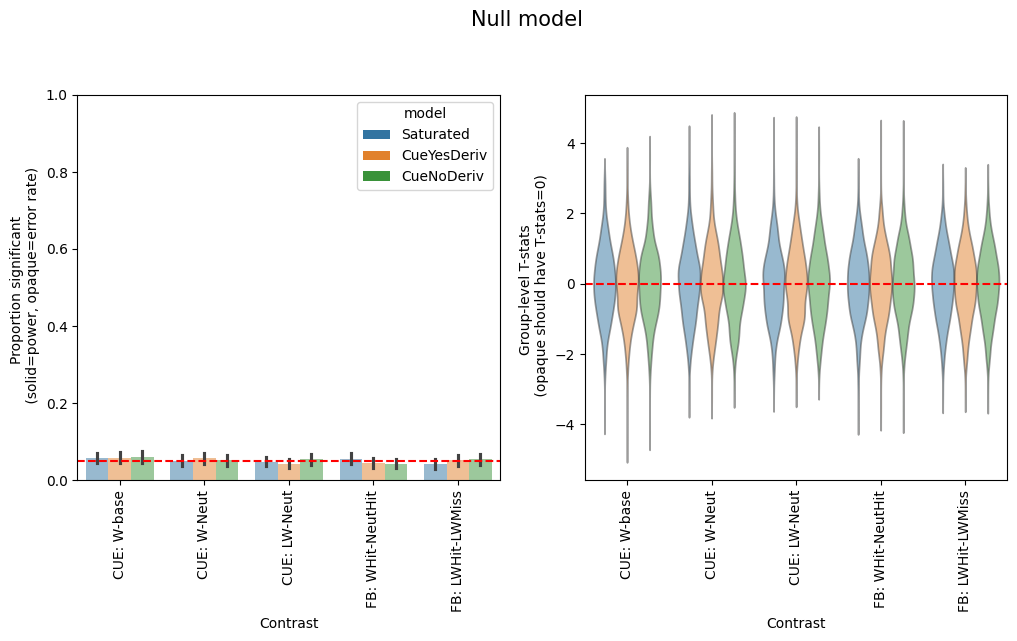

In [16]:
plot_dict_of_results(
    {'Null model': results_jitter['Null model']}, contrasts=True
)

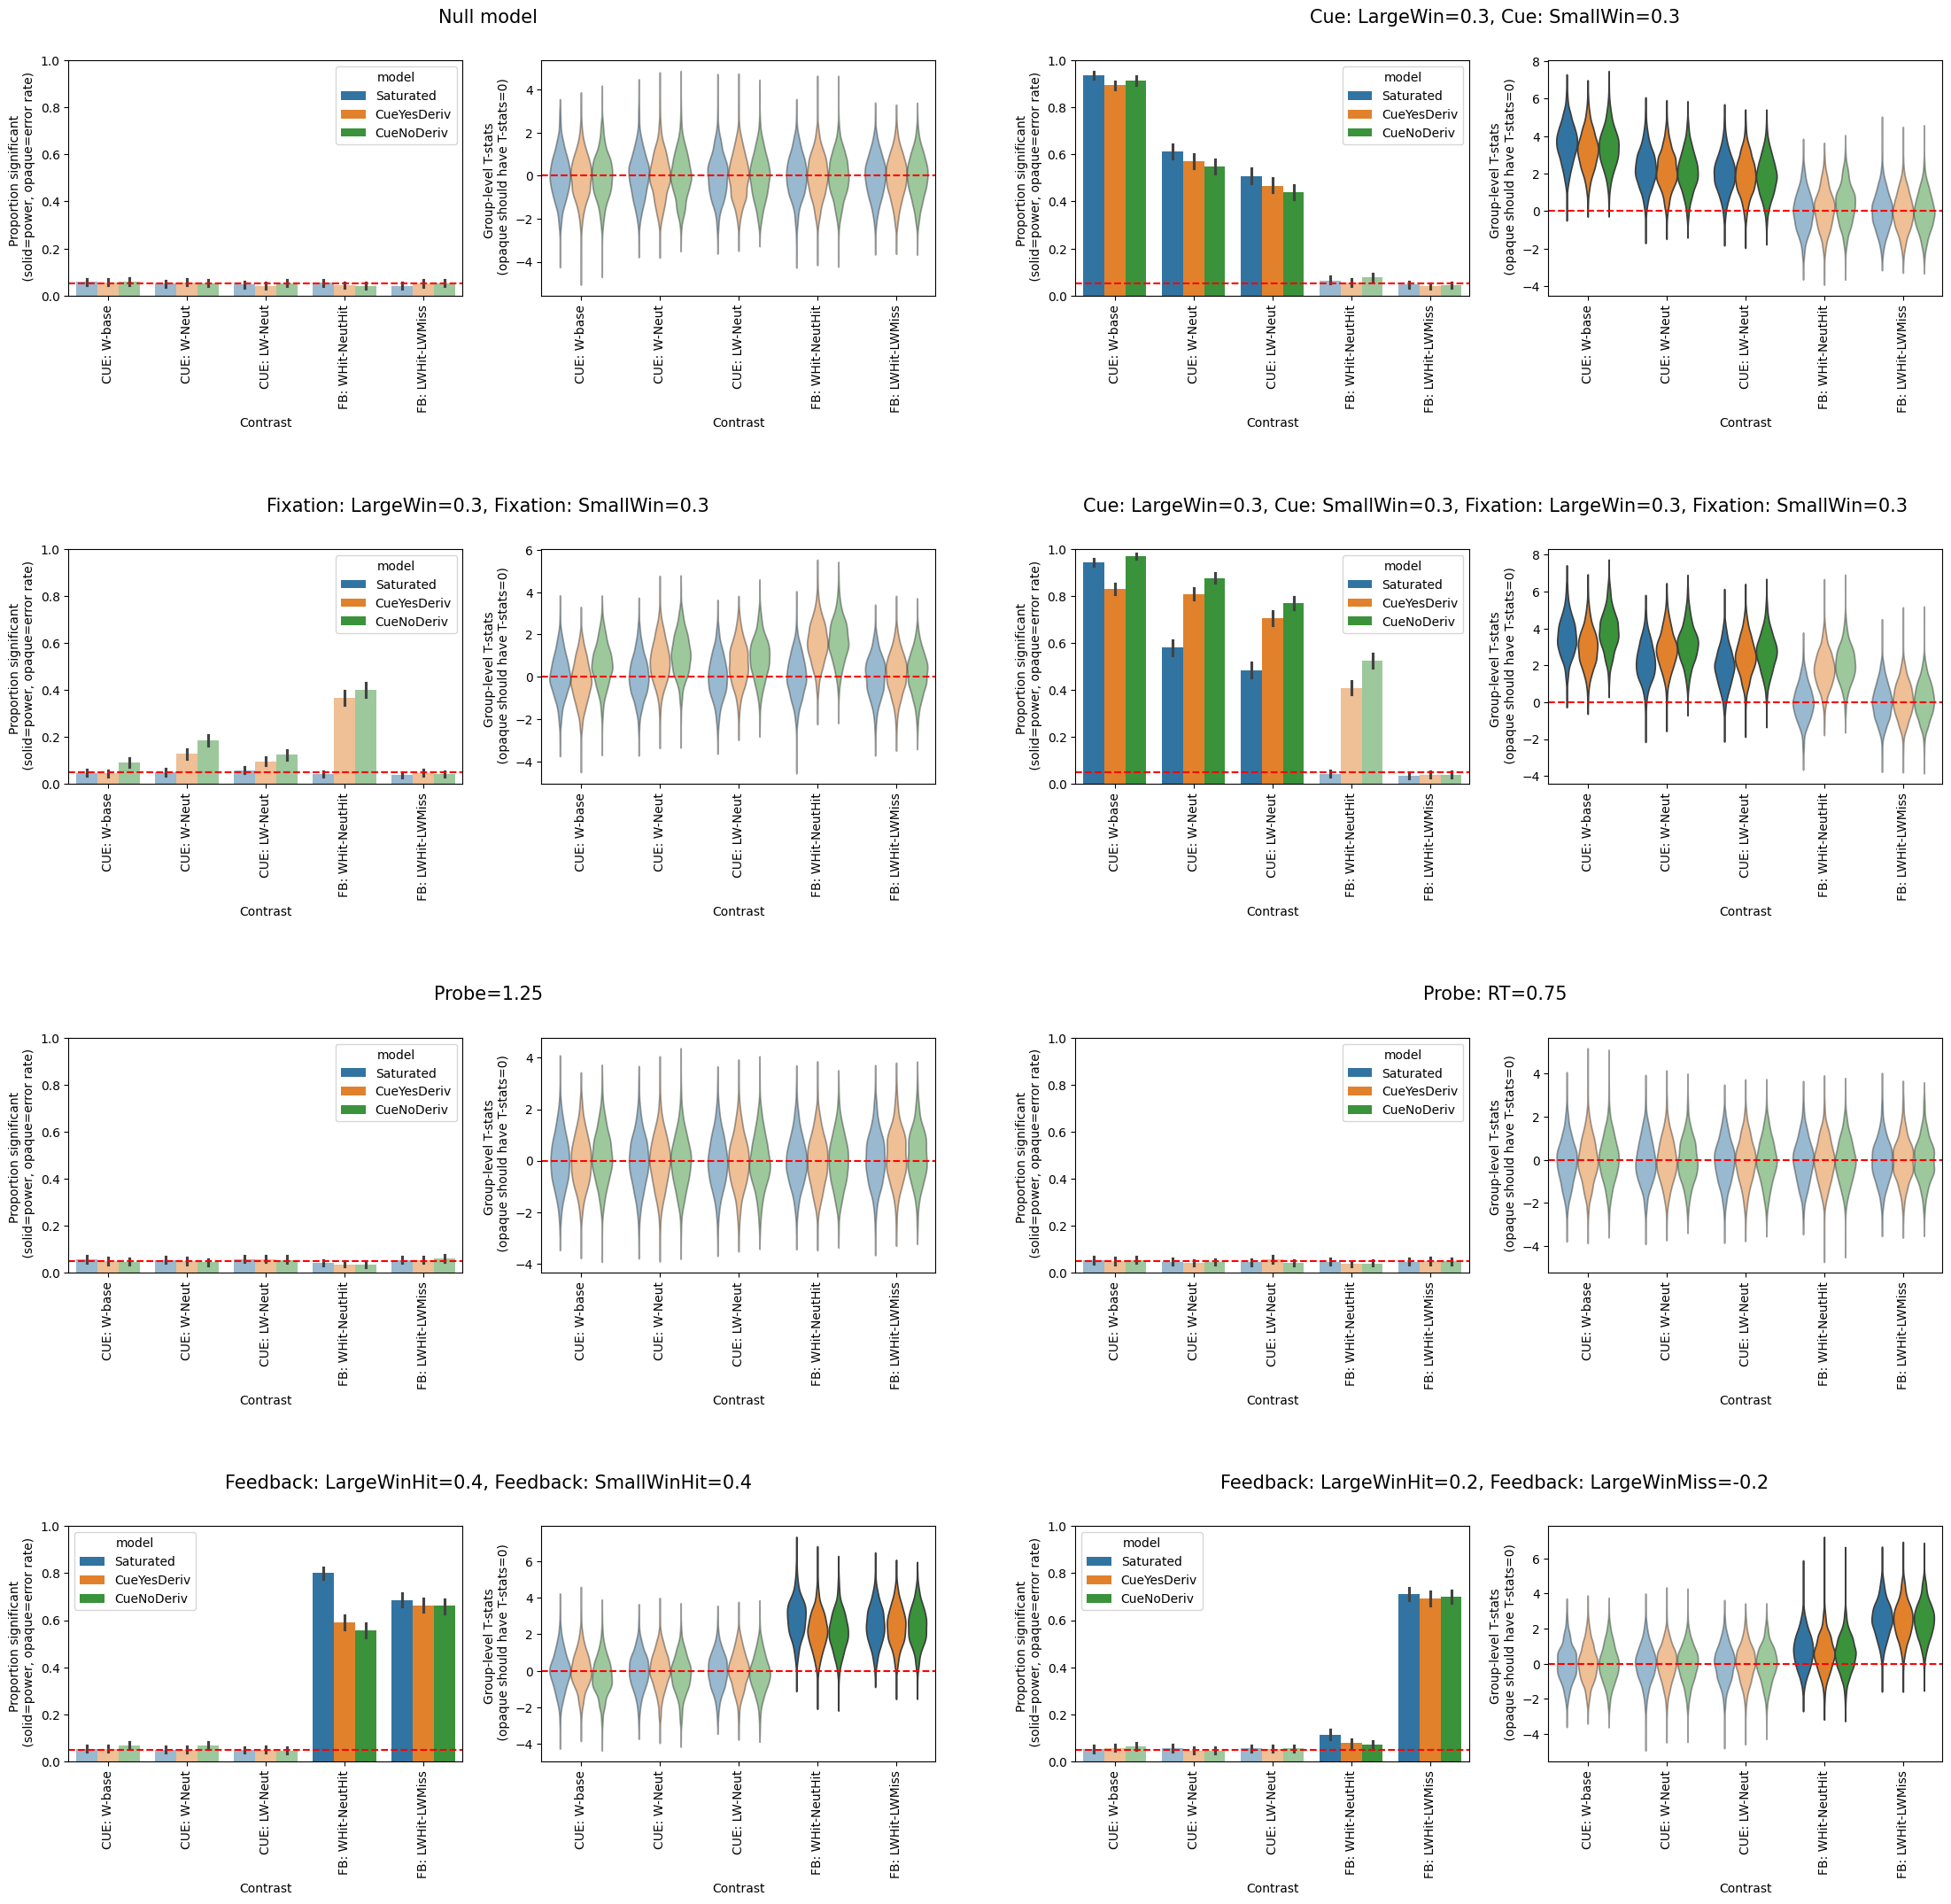

In [17]:
# results_jitter_plot = results_jitter.copy()
# results_jitter_plot.pop('Null model')
plot_dict_of_results(results_jitter, contrasts=True)

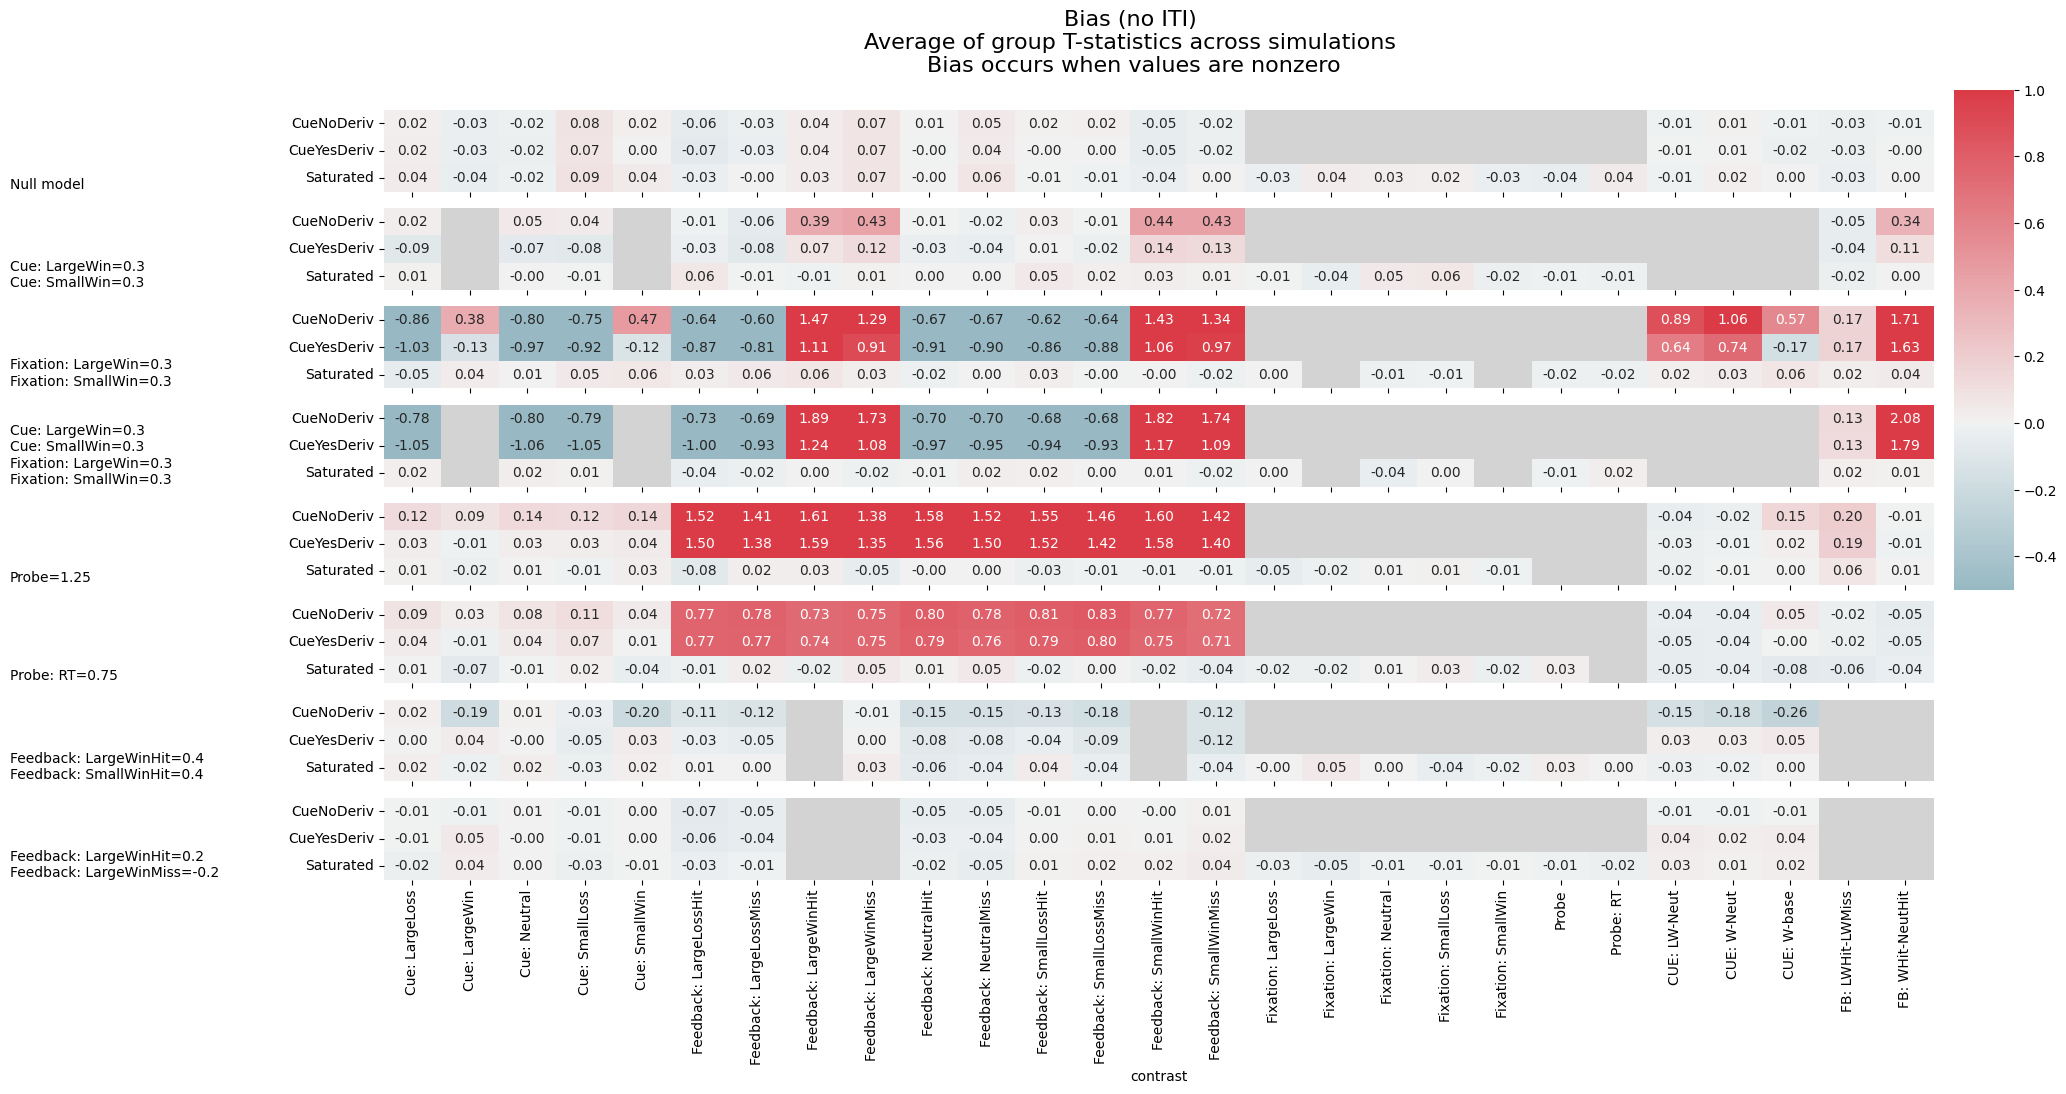

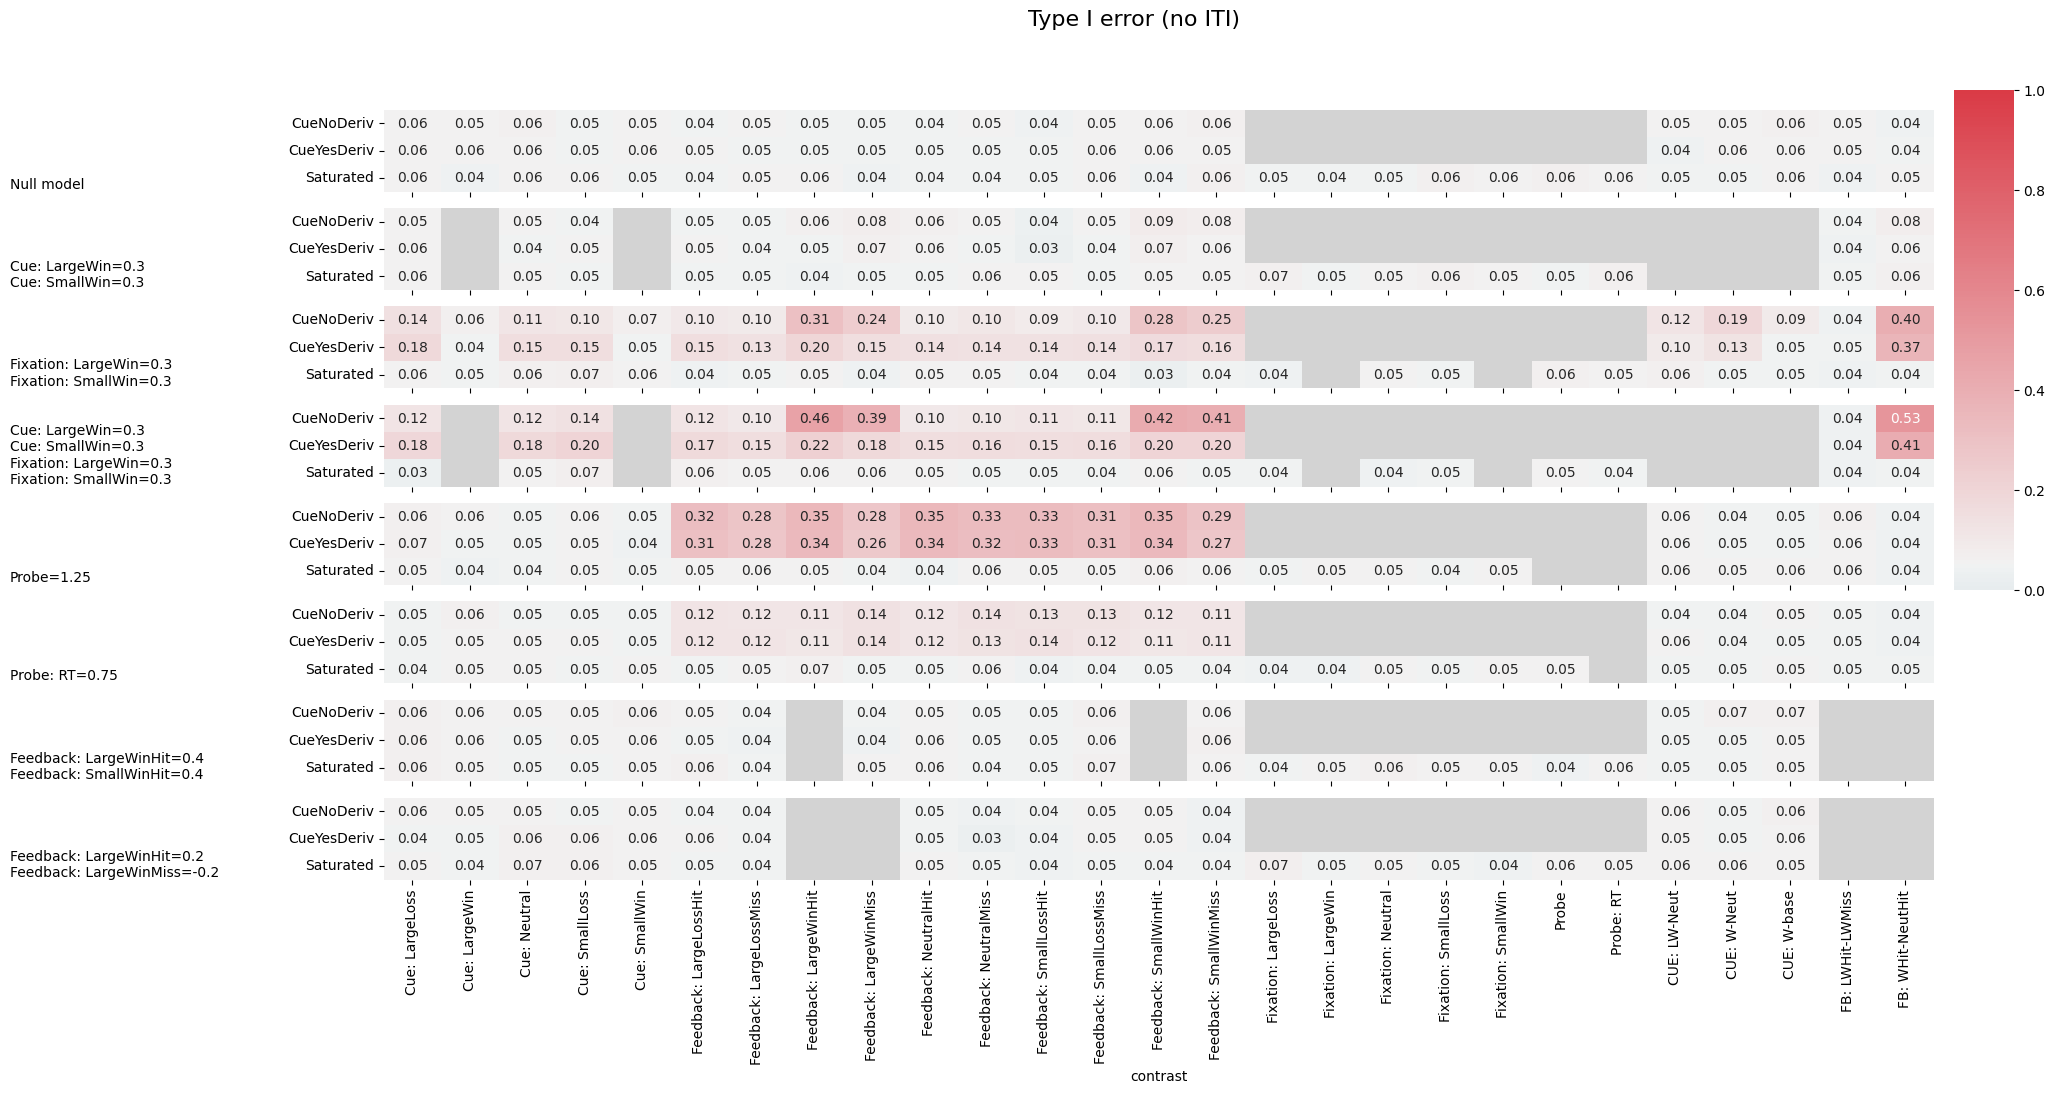

In [18]:
plot_bias(results_jitter)

plot_error_grid(results_jitter)

# VIFs/efficiency

In [19]:
# oversampling=50, tr=.8, previously 5 and 1
vif_eff_no_jitter = est_eff_vif_all_subs(
    oversampling=50, tr=0.8, dataset='ABCD'
)
vif_eff_yes_jitter = est_eff_vif_all_subs(
    oversampling=50,
    tr=0.8,
    jitter=True,
    jitter_iti_min=2,
    jitter_iti_max=6,
    dataset='ABCD',
)

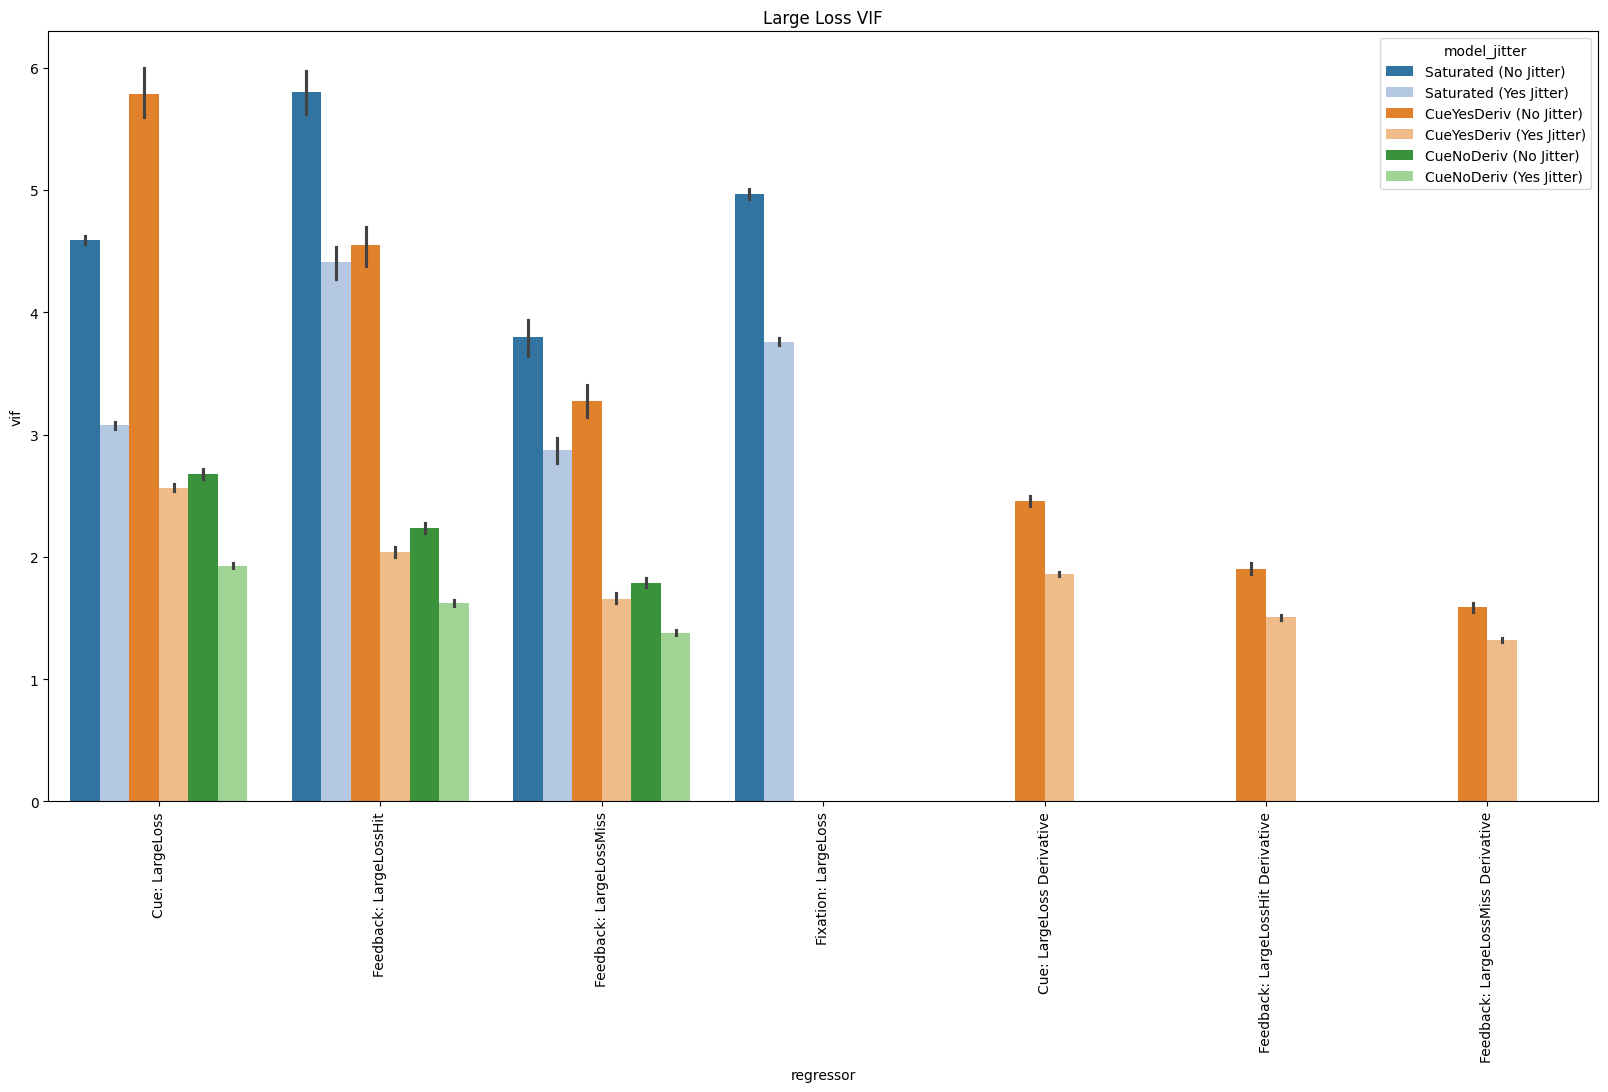

In [20]:
vif_eff_no_jitter['vifs']['Jitter'] = 'No Jitter'
vif_eff_yes_jitter['vifs']['Jitter'] = 'Yes Jitter'
vif_dat_plot = pd.concat(
    [vif_eff_no_jitter['vifs'], vif_eff_yes_jitter['vifs']]
)

vif_dat_plot['model_jitter'] = (
    vif_dat_plot['model'] + ' (' + vif_dat_plot['Jitter'] + ')'
)
# sufficient to just look at LargeLoss
vif_dat_large_loss = vif_dat_plot[
    vif_dat_plot['regressor'].str.contains('LargeLoss')
]
fig = plt.subplots(1, 1, figsize=(20, 10))
hue_order = [
    f'{model} {jitter_type}'
    for model in ['Saturated', 'CueYesDeriv', 'CueNoDeriv']
    for jitter_type in ['(No Jitter)', '(Yes Jitter)']
]
sns.barplot(
    data=vif_dat_large_loss,
    x='regressor',
    y='vif',
    hue='model_jitter',
    hue_order=hue_order,
    palette='tab20',
)
plt.tick_params(axis='x', rotation=90)
plt.title('Large Loss VIF')
plt.show()

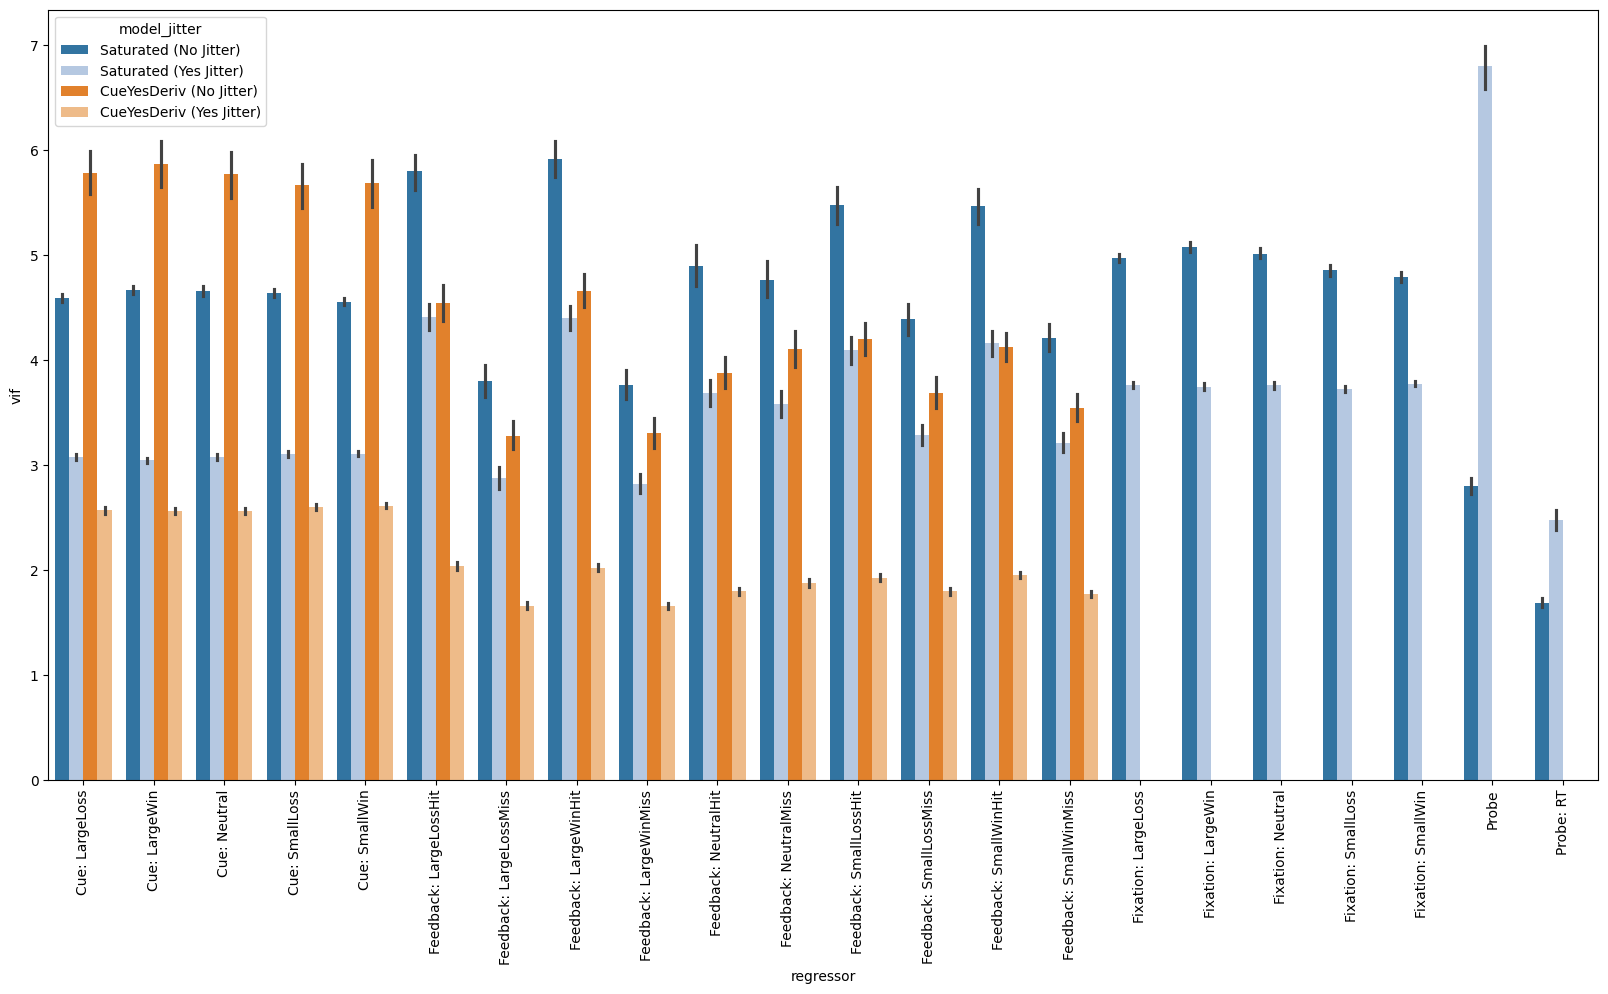

In [21]:
# Too messy with everything?
vif_trimmed = vif_dat_plot[
    ~vif_dat_plot['regressor'].str.contains('Derivative|constant')
]
vif_trimmed = vif_trimmed[~vif_trimmed['model'].str.contains('CueNoDeriv')]
fig = plt.subplots(1, 1, figsize=(20, 10))
hue_order = [
    f'{model} {jitter_type}'
    for model in ['Saturated', 'CueYesDeriv']
    for jitter_type in ['(No Jitter)', '(Yes Jitter)']
]
sns.barplot(
    data=vif_trimmed,
    x='regressor',
    y='vif',
    hue='model_jitter',
    hue_order=hue_order,
    palette='tab20',
)
plt.tick_params(axis='x', rotation=90)
# plt.title('Large Loss VIF')
plt.show()

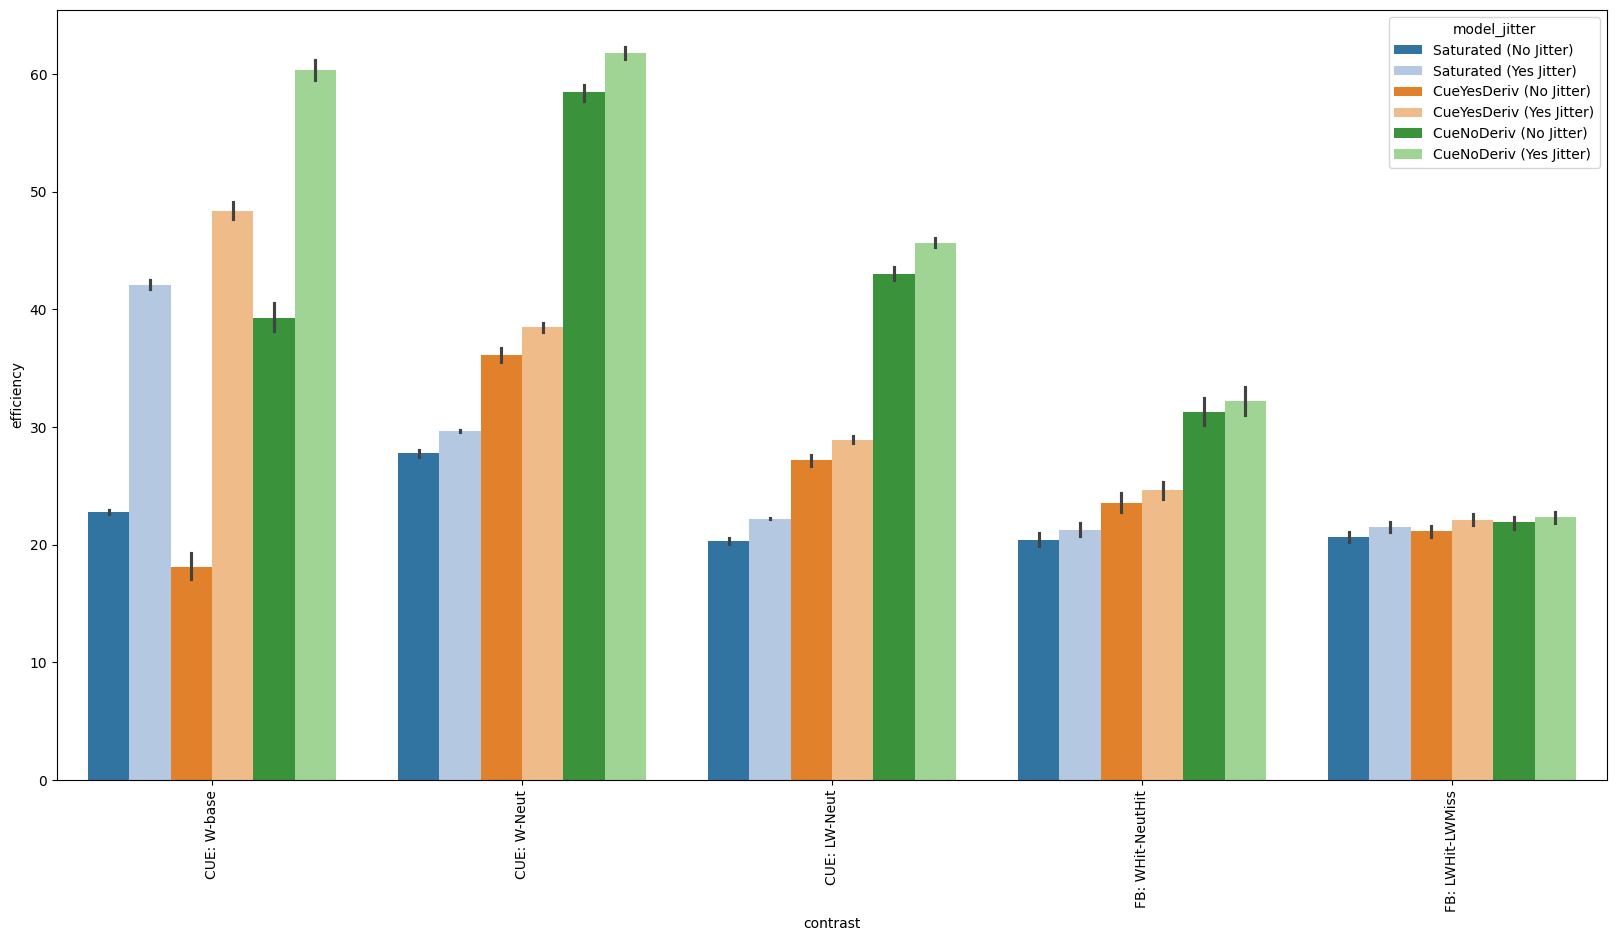

In [22]:
vif_eff_no_jitter['efficiencies']['Jitter'] = 'No Jitter'
vif_eff_yes_jitter['efficiencies']['Jitter'] = 'Yes Jitter'
eff_dat_plot = pd.concat(
    [vif_eff_no_jitter['efficiencies'], vif_eff_yes_jitter['efficiencies']]
)
eff_dat_plot['model_jitter'] = (
    eff_dat_plot['model'] + ' (' + eff_dat_plot['Jitter'] + ')'
)

eff_dat_no_cue_fix = eff_dat_plot
eff_dat_no_cue_fix_contrasts = eff_dat_no_cue_fix[
    eff_dat_no_cue_fix['contrast'].str.contains('-')
]

hue_order = [
    f'{model} {jitter_type}'
    for model in ['Saturated', 'CueYesDeriv', 'CueNoDeriv']
    for jitter_type in ['(No Jitter)', '(Yes Jitter)']
]

fig = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(
    data=eff_dat_no_cue_fix_contrasts,
    x='contrast',
    y='efficiency',
    hue='model_jitter',
    hue_order=hue_order,
    palette='tab20',
)
# plt.ylim(0,.01)
plt.tick_params(axis='x', rotation=90)
plt.show()